# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [414]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [415]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [416]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [417]:
# Load the superkart csv file from the diretory
superkart = pd.read_csv('/content/drive/MyDrive/Projects/SuperKart/SuperKart.csv')

In [418]:
# copying data to preserve original data file
data = superkart.copy()

# **Data Overview**

## View the first and last 3 rows of the dataset

In [419]:
# ***View the head(3) and tail(3) of data
print('Data Overview - Head Views')
print('\n')  #spacer
data.head(3) #display first 3 rows

Data Overview - Head Views




,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16


In [420]:
# ***View tail(3) of data
print('Data Overview - Tail Views')
print('\n')  #spacer
data.tail(3) #display last 3 row

Data Overview - Tail Views




,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


##Data Shape

In [421]:
#***Data Shape***
data.shape

(8763, 12)

In [422]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  #display the number of rows and columns

There are 8763 rows and 12 columns.


#### Check the data types of the columns for the dataset

In [423]:
#*** Use data .info to get dtype and count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


Get Stat Summary

In [424]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Weight,8763.0,12.653792,2.217320,4.000,11.150,12.660,14.180,22.000
Product_Allocated_Area,8763.0,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_MRP,8763.0,147.032539,30.694110,31.000,126.160,146.740,167.585,266.000
Store_Establishment_Year,8763.0,2002.032751,8.388381,1987.000,1998.000,2009.000,2009.000,2009.000
Product_Store_Sales_Total,8763.0,3464.003640,1065.630494,33.000,2761.715,3452.340,4145.165,8000.000


In [425]:
#More Checks-> isnull and duplicates
data.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


In [426]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [427]:
#Few More Checks-> nunique
data.nunique()

,0
Product_Id,8763
Product_Weight,1113
Product_Sugar_Content,4
Product_Allocated_Area,228
Product_Type,16
Product_MRP,6100
Store_Id,4
Store_Establishment_Year,4
Store_Size,3
Store_Location_City_Type,3


## **Comments and Observation**
1.   No missing value problem
2.   We have 7 object data type
3.   4 Floats(Weight, Allocated Area, MRP,and Salea Total), and
4.   1 Int64 (store establimsnent year)
5.   We will not drop any of the columns


# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

#### **The Four Columns with Float data type would be analysed with histogram box plot**

In [428]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(11, 6), kde=False, bins=None):
    """
    boxplot and histogram combined on the same scale.

    Parameters:
    - data: pandas DataFrame
    - feature: column name (string)
    - figsize: tuple, size of the figure (default: (12, 7))
    - kde: bool, whether to show kernel density estimate (default: False)
    - bins: int, number of bins for histogram (default: None)
    """
    # Set c style
    #sns.set_style("whitegrid")
    #sns.set_context("notebook", font_scale=1.2)
    # Set style
    sns.set_style("darkgrid")
    sns.set_context("talk", font_scale=0.8)
    sns.set_palette("bright")


    # Create subplots
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box,
        showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
        boxprops={"facecolor": "#D8BFD8"},  # light violet
        medianprops={"color": "black"},
        whiskerprops={"color": "gray"},
        capprops={"color": "gray"}
    )
    ax_box.set(xlabel="")
    ax_box.set_title(f"Distribution of '{feature}'", fontsize=14, fontweight='bold')
    ax_box.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Histogram
    if bins:
        histplot = sns.histplot(
            data=data,
            x=feature,
            kde=kde,
            ax=ax_hist,
            bins=bins,
            color="#4682B4",  # steel blue
            edgecolor="white"
        )
    else:
        histplot = sns.histplot(
            data=data,
            x=feature,
            kde=kde,
            ax=ax_hist,
            color="#4682B4",  # steel blue
            edgecolor="white"
        )


    # Add mean and median lines
    mean_val = data[feature].mean()
    median_val = data[feature].median()
    ax_hist.axvline(mean_val, color="green", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
    ax_hist.axvline(median_val, color="red", linestyle="-", linewidth=2, label=f"Median: {median_val:.2f}")

    # Annotate mean and median
    ax_hist.legend(loc="upper right")
    ax_hist.set_xlabel(feature, fontsize=12)
    ax_hist.set_ylabel("Frequency", fontsize=12)
    ax_hist.grid(True, linestyle="--", alpha=0.5)

    plt.tight_layout()
    plt.show()

### **Product_Weight**

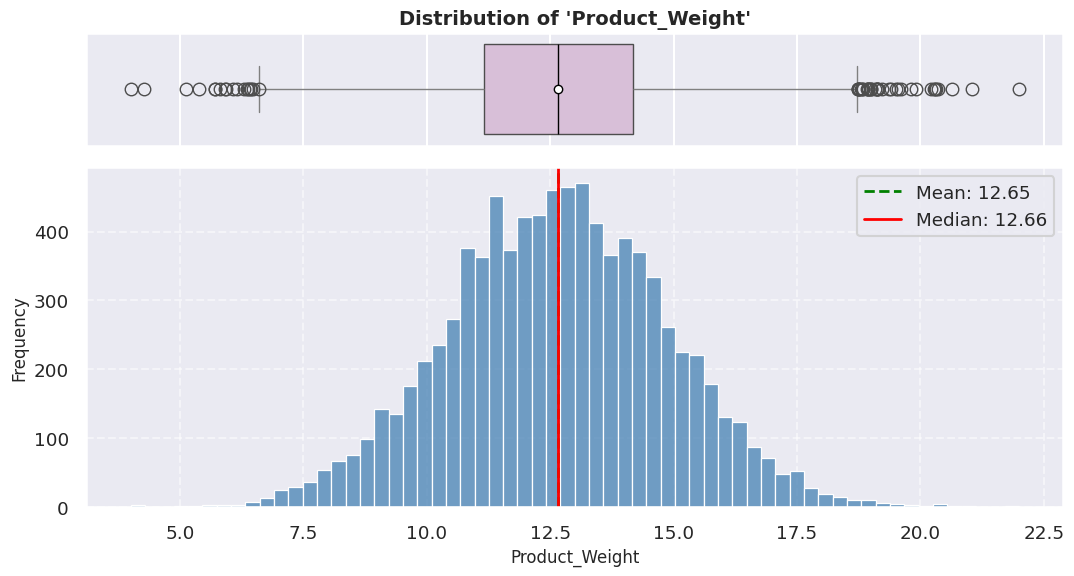

In [429]:
histogram_boxplot(data, "Product_Weight")

### **Product_Allocated_Area**

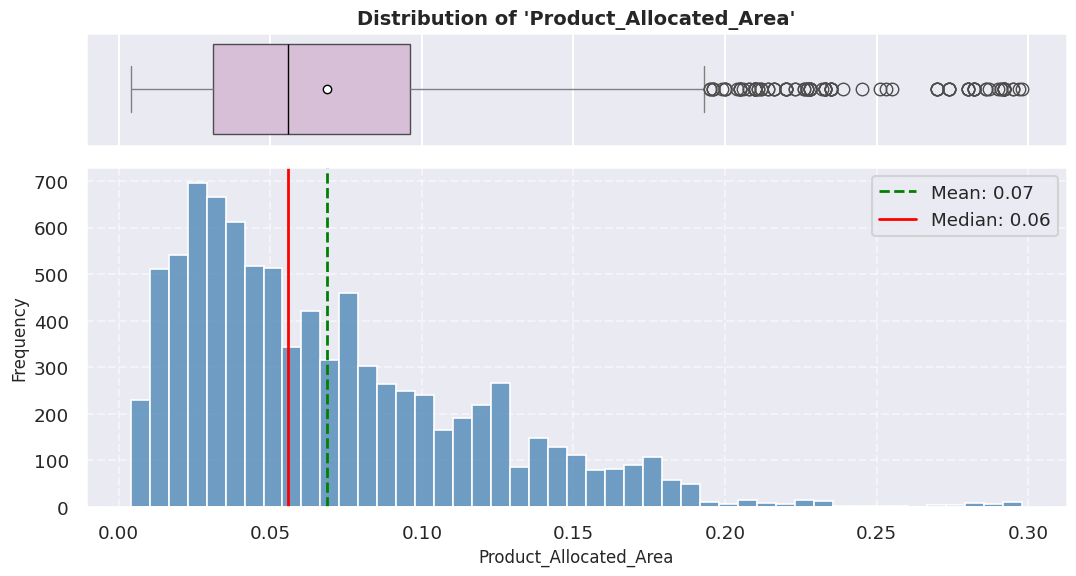

In [430]:
histogram_boxplot(data, "Product_Allocated_Area")

### **Product_MRP**

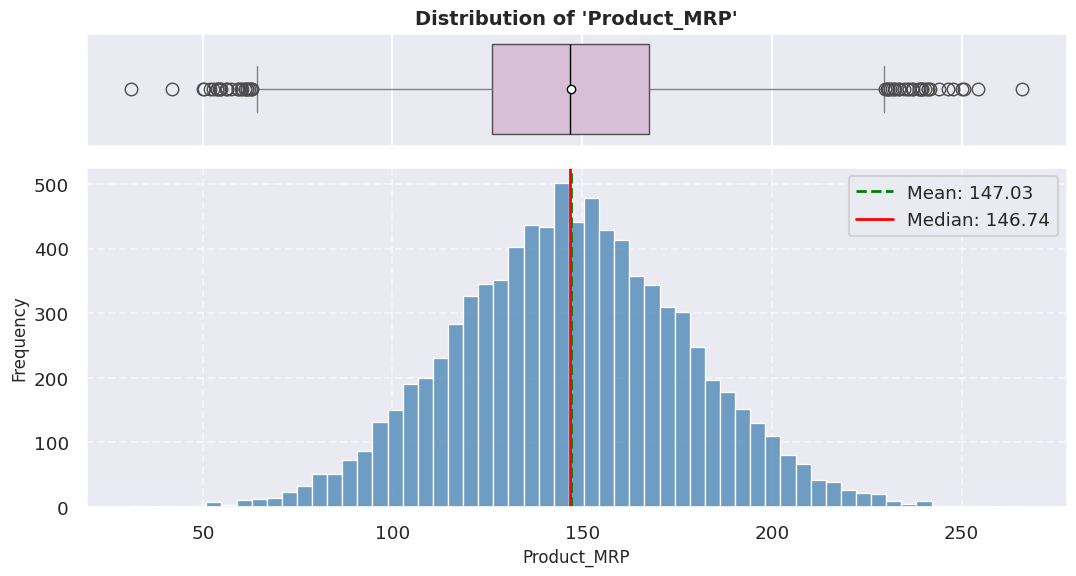

In [431]:
histogram_boxplot(data, "Product_MRP")

### **Product_Store_Sales_Total**

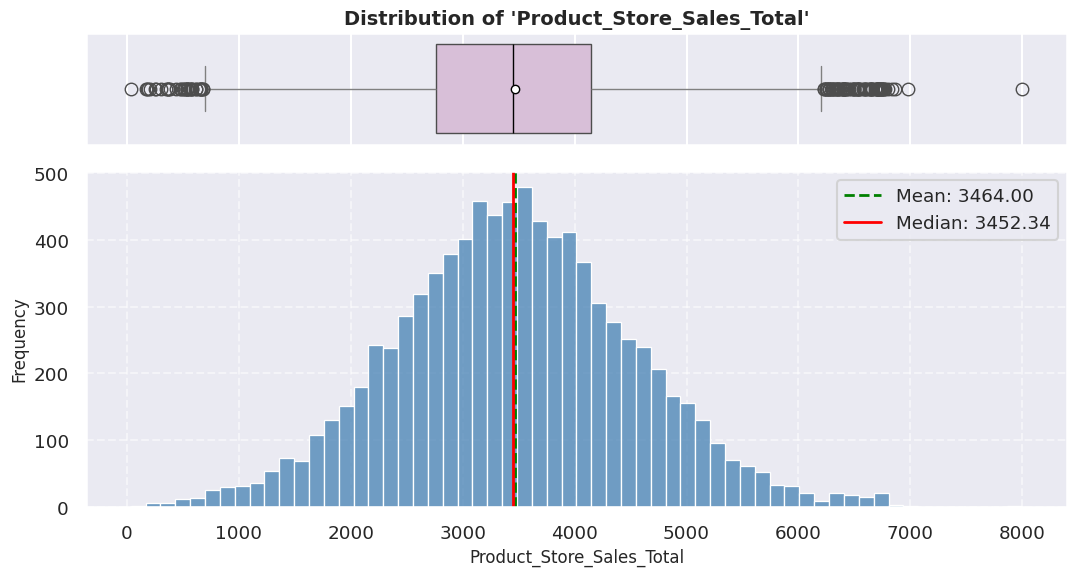

In [432]:
histogram_boxplot(data, "Product_Store_Sales_Total")

## **Comments and Observation**
1. Product allocated area is right skewed while other histograms are normal
2. Products with lesser allocated space ration have higher sales count

#### **The Seven Columns with Object data type would be analysed with bar plot**

### **Product_Sugar_Content**

In [433]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    barplot with count or percentage labels.

    Parameters:
    - data: pandas DataFrame
    - feature: column name (string)
    - perc: bool, display percentages instead of counts (default: False)
    - n: int, number of top categories to display (default: None = all)
    """
    # Set style
    sns.set_style("darkgrid")
    sns.set_context("talk", font_scale=0.8)
    sns.set_palette("bright")

    total = len(data[feature])
    value_counts = data[feature].value_counts()
    categories = value_counts.index[:n] if n else value_counts.index
    count = len(categories)

    plt.figure(figsize=(max(6, count * 0.8), 5))
    ax = sns.countplot(
        data=data,
        x=feature,
        order=categories,
        palette="Set2"
    )

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f"Distribution of '{feature}'", fontsize=14, fontweight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count" if not perc else "Count", fontsize=12)

    # Annotate bars
    for p in ax.patches:
        height = p.get_height()
        label = f"{100 * height / total:.1f}%" if perc else f"{height}"
        ax.annotate(
            label,
            (p.get_x() + p.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold",
            xytext=(0, 5),
            textcoords="offset points"
        )

    plt.tight_layout()
    plt.show()

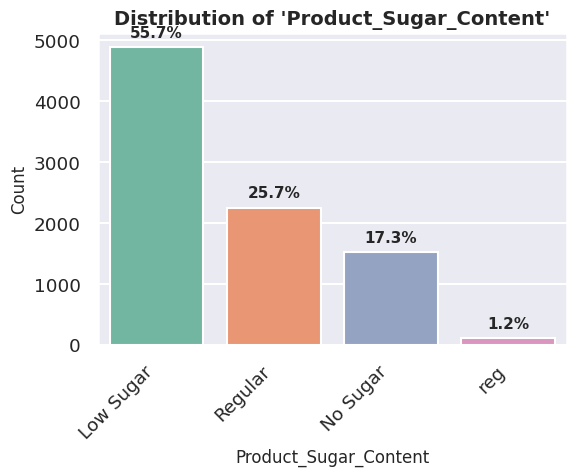

In [434]:
labeled_barplot(data, "Product_Sugar_Content", perc=True)

## **Value Treatment- Processing Data**
## **Replace the 'reg' in the above with "regular" and save data**

In [435]:
#replace 'reg' in Product_Sugar_Content column with 'Regular' and save as data1
data1 = data.copy()
data1['Product_Sugar_Content'] = data1['Product_Sugar_Content'].replace('reg', 'Regular')

### **Re-Create Bar Plot for Product_Sugar_Content column**

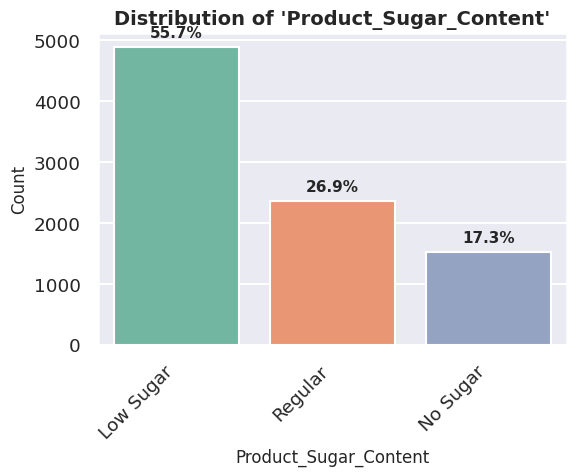

In [436]:
labeled_barplot(data1, "Product_Sugar_Content", perc=True)

### **Product_Type**

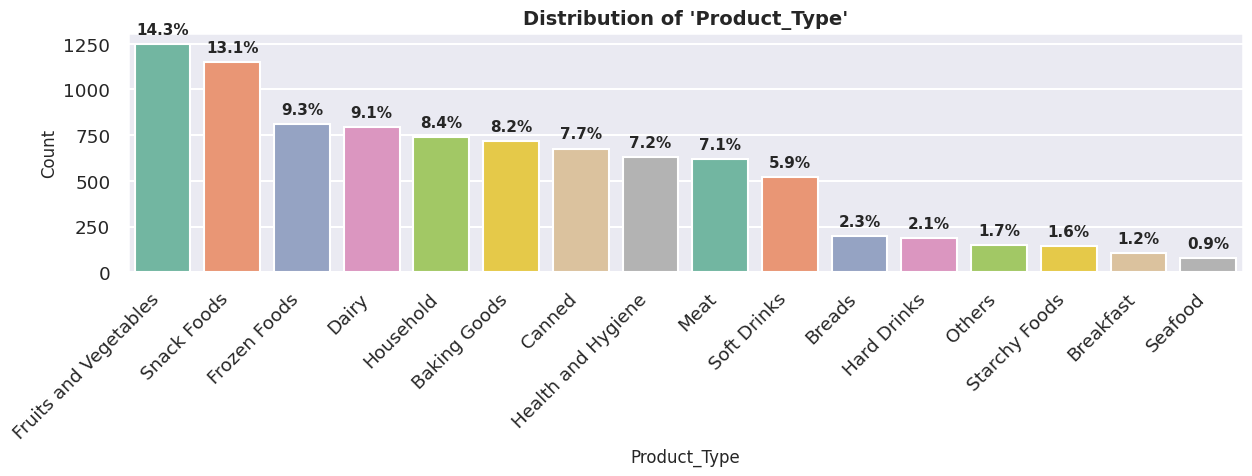

In [437]:
labeled_barplot(data, "Product_Type", perc=True)

### **Store_Id**

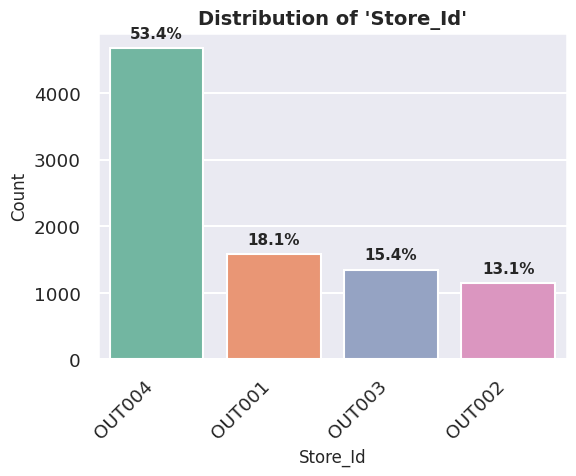

In [438]:
labeled_barplot(data, "Store_Id", perc=True)

### **Store_Type**

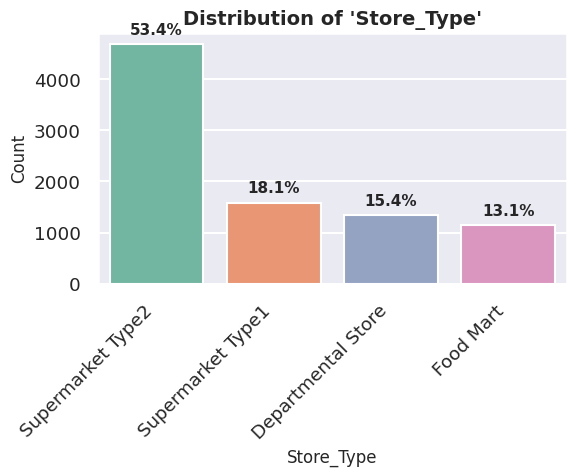

In [439]:
labeled_barplot(data, "Store_Type", perc=True)

## **Comments and Observations**

1. Percentage of Store Type and Store_Id is matching.
2. Meaning  Each of the Store Types is tracking  the corresponding Store_Id.


### **Store_Size**

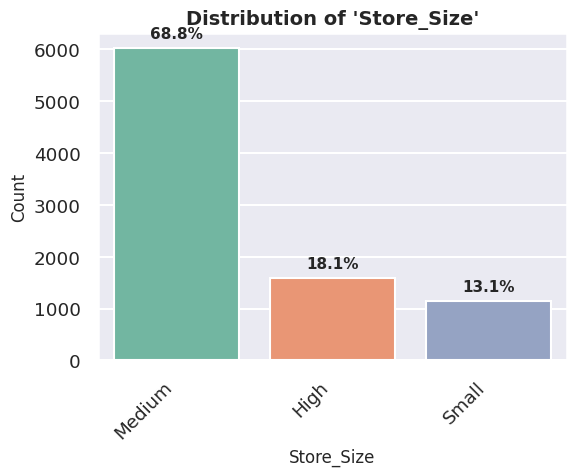

In [440]:
labeled_barplot(data, "Store_Size", perc=True)

### **Store_Location_City_Type**

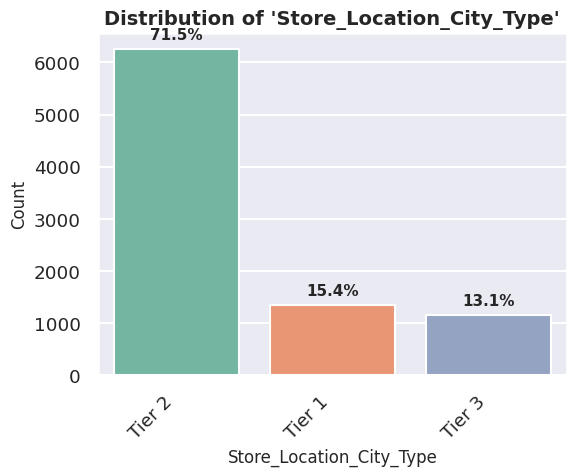

In [441]:
labeled_barplot(data, "Store_Location_City_Type", perc=True)

## Bivariate Analysis

### **Correlation matrix**

### **Numberic Features would be analysed with Correlation Matrix**

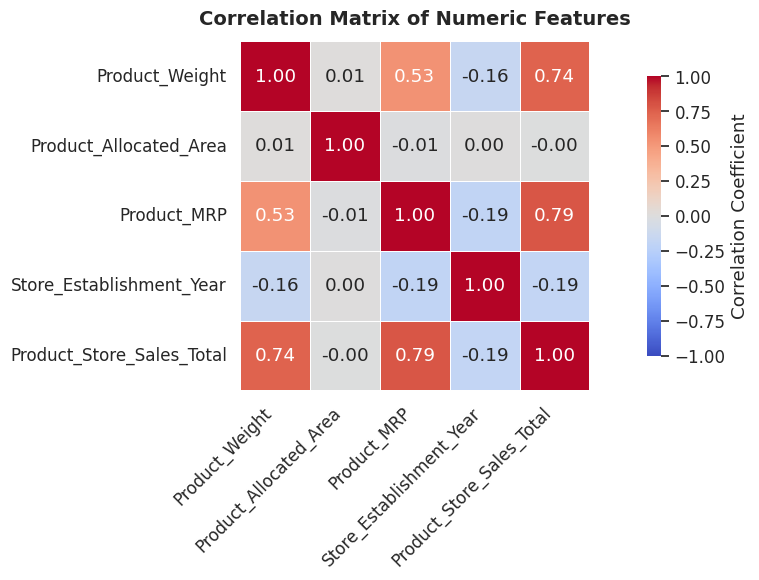

In [442]:

# Select numeric columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()
corr_matrix = data[cols_list].corr()

#Set style
sns.set_style("white")
sns.set_context("notebook", font_scale=1.1)

# Create heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="white",
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Title and axis styling
plt.title("Correlation Matrix of Numeric Features", fontsize=14, fontweight='bold', pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **Comments and Observation**
1. Store Sales and MRP have hishest Correlation of 79%
2. Store Sales and Weight havesecond highest correlation of 74%
3. MRP and Weight have the third highest correlation of 53%.
4. Others have weak corr:-19%(MRP/Est Year), -16%(Weight/Est Year).

### **Distribution of Target variable i.e Product_Store_Sales_Total with the numeric columns**

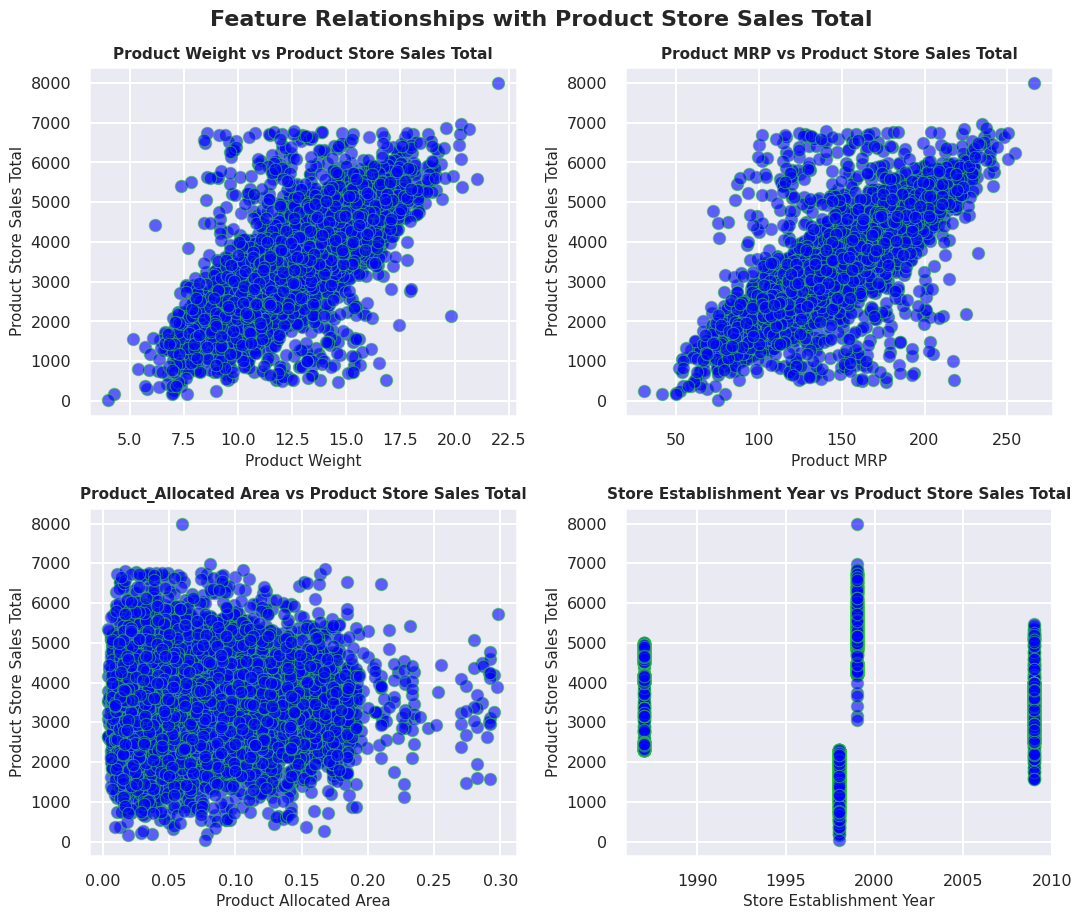

In [443]:
# Set style
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7)
sns.set_palette("bright")

# Define features and titles
features = [
    ("Product_Weight", "Product Weight vs Product Store Sales Total"),
    ("Product_MRP", "Product MRP vs Product Store Sales Total"),
    ("Product_Allocated_Area", "Product_Allocated Area vs Product Store Sales Total"),
    ("Store_Establishment_Year", "Store Establishment Year vs Product Store Sales Total")
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(11, 9))
axes = axes.flatten()

# Plot each scatter
for i, (feature, title) in enumerate(features):
    sns.scatterplot(
        x=data[feature],
        y=data["Product_Store_Sales_Total"],
        ax=axes[i],
        alpha=0.6,
        edgecolor="limegreen",
        color="blue"
    )
    axes[i].set_title(title, fontsize=11, fontweight='bold')
    axes[i].set_xlabel(feature.replace("_", " "), fontsize=11)
    axes[i].set_ylabel("Product Store Sales Total", fontsize=11)

# Adjust layout
plt.tight_layout()
plt.suptitle("Feature Relationships with Product Store Sales Total", fontsize=16, fontweight='bold', y=1.02)
plt.show()

## **Comments and Observation**
1. There is a direct positive correlation between Product Weight and total sales(revenue)
2. There is a direct positive correlation between Product MRP (max price)  and total sales(revenue)
3. From Above we have dense distribution of sales (revenue) with lower product allocated area ratio
4. It is difficult to make assessment of sales revenue based on store establishment year from above.

### **Products Store Sales Total by Product Type and Product Sugar Content**

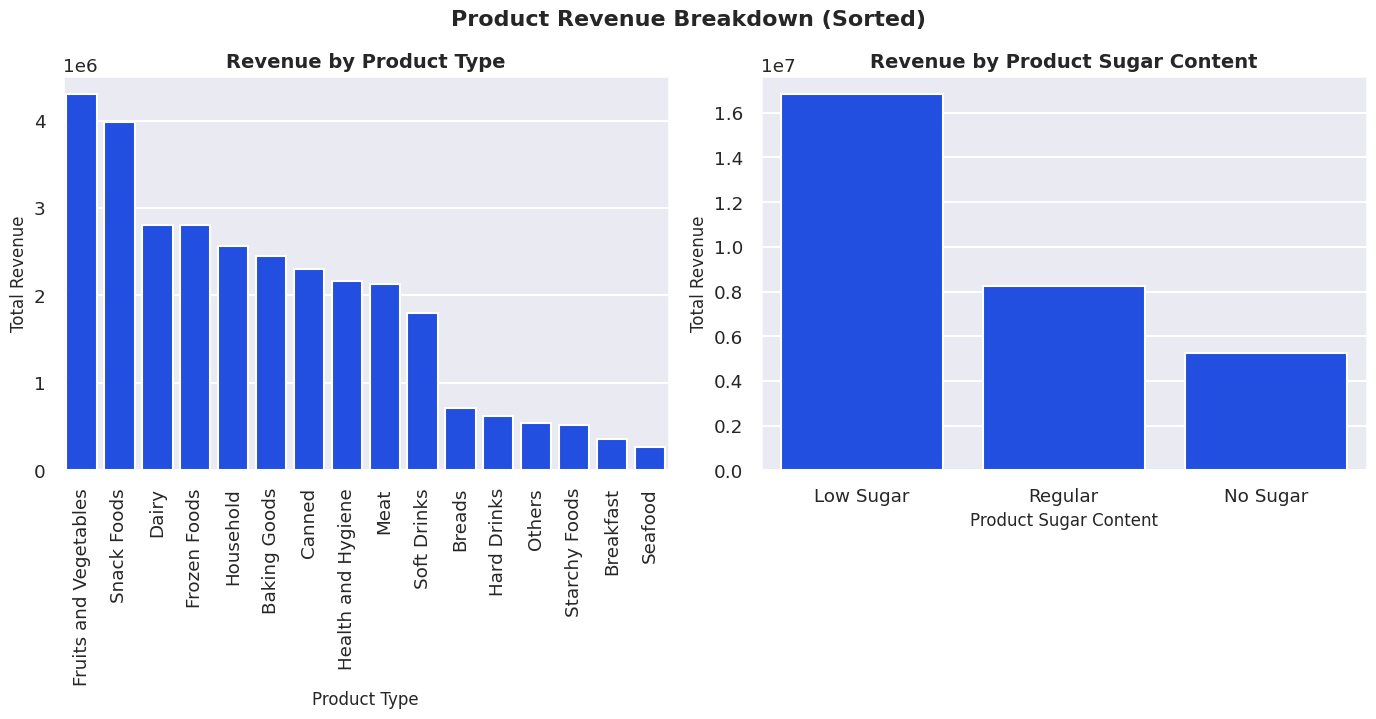

In [444]:
# Prepare and sort data
df_revenue1 = data1.groupby("Product_Type", as_index=False)["Product_Store_Sales_Total"].sum()
df_revenue1 = df_revenue1.sort_values(by="Product_Store_Sales_Total", ascending=False)

df_revenue2 = data1.groupby("Product_Sugar_Content", as_index=False)["Product_Store_Sales_Total"].sum()
df_revenue2 = df_revenue2.sort_values(by="Product_Store_Sales_Total", ascending=False)

# Set style

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.8)
sns.set_palette("bright")


# Create subplots
fig, axes = plt.subplots(1,2, figsize=(14,7))

# Bar plot: Revenue by Product Type
sns.barplot(
    x="Product_Type",
    y="Product_Store_Sales_Total",
    data=df_revenue1,
    ax=axes[0],
    order=df_revenue1["Product_Type"]
)
axes[0].set_title("Revenue by Product Type", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Product Type", fontsize=12)
axes[0].set_ylabel("Total Revenue", fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Bar plot: Revenue by Sugar Content
sns.barplot(
    x="Product_Sugar_Content",
    y="Product_Store_Sales_Total",
    data=df_revenue2,
    ax=axes[1],
    order=df_revenue2["Product_Sugar_Content"]
)
axes[1].set_title("Revenue by Product Sugar Content", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Product Sugar Content", fontsize=12)
axes[1].set_ylabel("Total Revenue", fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

# Layout adjustment
plt.tight_layout()
plt.suptitle("Product Revenue Breakdown (Sorted)", fontsize=16, fontweight='bold', y=1.03)
plt.show()

## **Comments and Observation**
1. Product type with contributing the MOST to sales revenue is Fruits and Vegetables
2. Product type with contributing the LEAST most to sales revenue is Seafood
3. Products with LOW SUGAR Content contributes the MOST to Total Revenue
4. No SUGAR produts contributes the LEAST to Total Sales Revunue

### **Products Store Sales Total by Store Type, Store Size and City Tier**

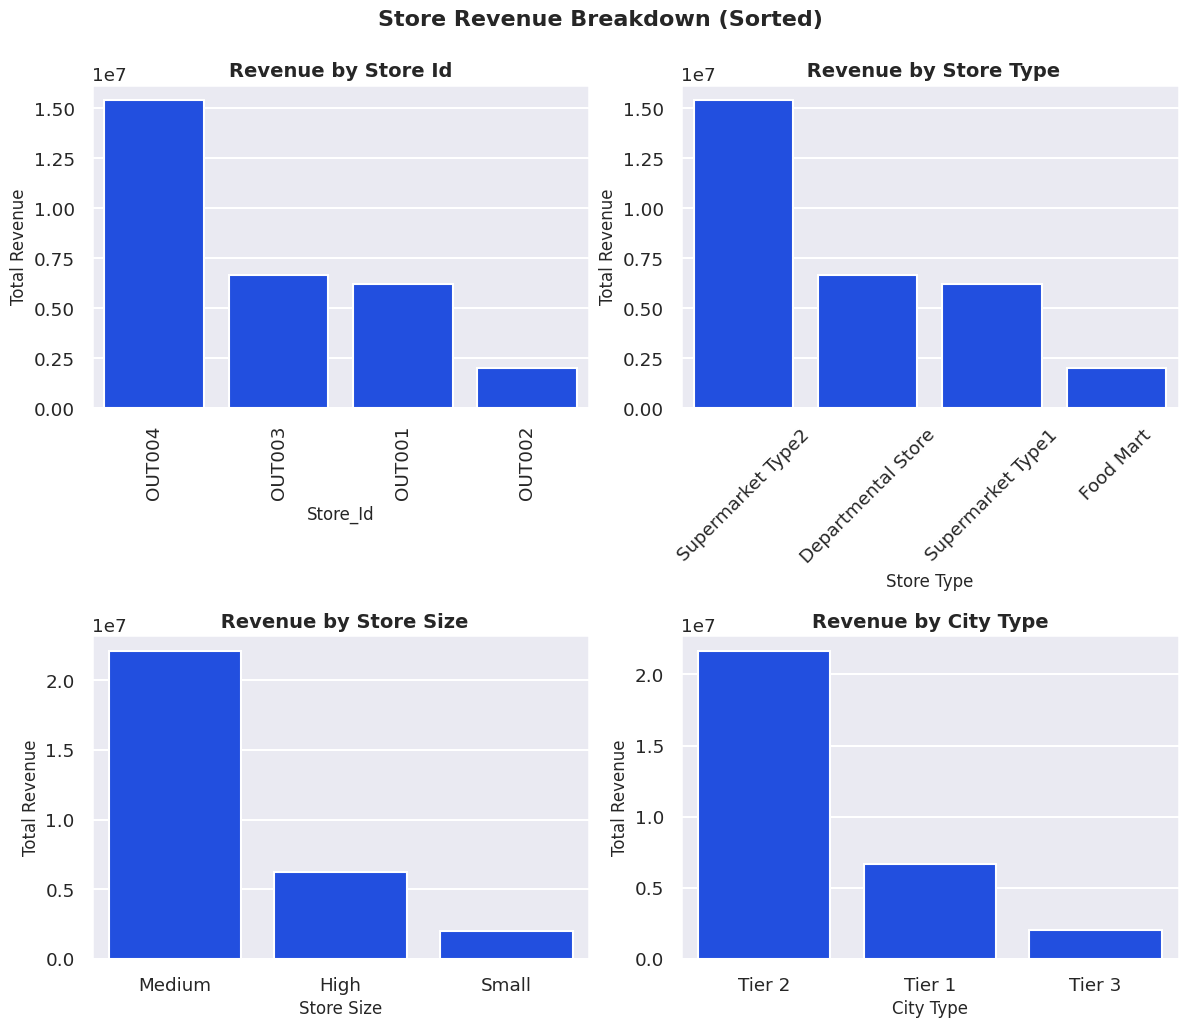

In [445]:
# Prepare and sort data
df_revenue3 = data1.groupby("Store_Id", as_index=False)["Product_Store_Sales_Total"].sum()
df_revenue3 = df_revenue3.sort_values(by="Product_Store_Sales_Total", ascending=False)

df_revenue4 = data1.groupby("Store_Type", as_index=False)["Product_Store_Sales_Total"].sum()
df_revenue4 = df_revenue4.sort_values(by="Product_Store_Sales_Total", ascending=False)

df_revenue5 = data1.groupby("Store_Size", as_index=False)["Product_Store_Sales_Total"].sum()
df_revenue5 = df_revenue5.sort_values(by="Product_Store_Sales_Total", ascending=False)

df_revenue6 = data1.groupby("Store_Location_City_Type", as_index=False)["Product_Store_Sales_Total"].sum()
df_revenue6 = df_revenue6.sort_values(by="Product_Store_Sales_Total", ascending=False)

# Set style

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.8)
sns.set_palette("bright")


# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

# Bar plot1: Revenue by Store_Id
sns.barplot(
    x="Store_Id",
    y="Product_Store_Sales_Total",
    data=df_revenue3,
    ax=axes[0],
    order=df_revenue3["Store_Id"]
)
axes[0].set_title("Revenue by Store Id", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Store_Id", fontsize=12)
axes[0].set_ylabel("Total Revenue", fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: Revenue by Store Type
sns.barplot(
    x="Store_Type",
    y="Product_Store_Sales_Total",
    data=df_revenue4,
    ax=axes[1],
    order=df_revenue4["Store_Type"]
)
axes[1].set_title(" Revenue by Store Type", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Store Type", fontsize=12)
axes[1].set_ylabel("Total Revenue", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)


# Plot 3: Revenue by Store Size
sns.barplot(
    x="Store_Size",
    y="Product_Store_Sales_Total",
    data=df_revenue5,
    ax=axes[2],
    order=df_revenue5["Store_Size"]
)

axes[2].set_title(" Revenue by Store Size", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Store Size", fontsize=12)
axes[2].set_ylabel("Total Revenue", fontsize=12)
axes[2].tick_params(axis='x', rotation=0)

# Plot 4: Revenue by City Type
sns.barplot(
    x="Store_Location_City_Type",
    y="Product_Store_Sales_Total",
    data=df_revenue6,
    ax=axes[3],
    order=df_revenue6["Store_Location_City_Type"]
)
axes[3].set_title("Revenue by City Type", fontsize=14, fontweight='bold')
axes[3].set_xlabel("City Type", fontsize=12)
axes[3].set_ylabel("Total Revenue", fontsize=12)
axes[3].tick_params(axis='x', rotation=0)

# Final layout
plt.tight_layout()
plt.suptitle("Store Revenue Breakdown (Sorted)", fontsize=16, fontweight='bold', y=1.03)
plt.show()

## **Comments and Observation**
1. Store ID OUT004 contibutes the MOST to sales revenue and OUT002 have LEAST revenue
2. MEDIUM Store sizes contributes the MOST to sales revenue while SMALL store sizes contribites the least
3. Stores in City Tier-2 contibutes the MOST revenue revenue while Tier-3 contributes the least revenue

### **Products_Store_Sales_Total by Other Categorical Varibales**

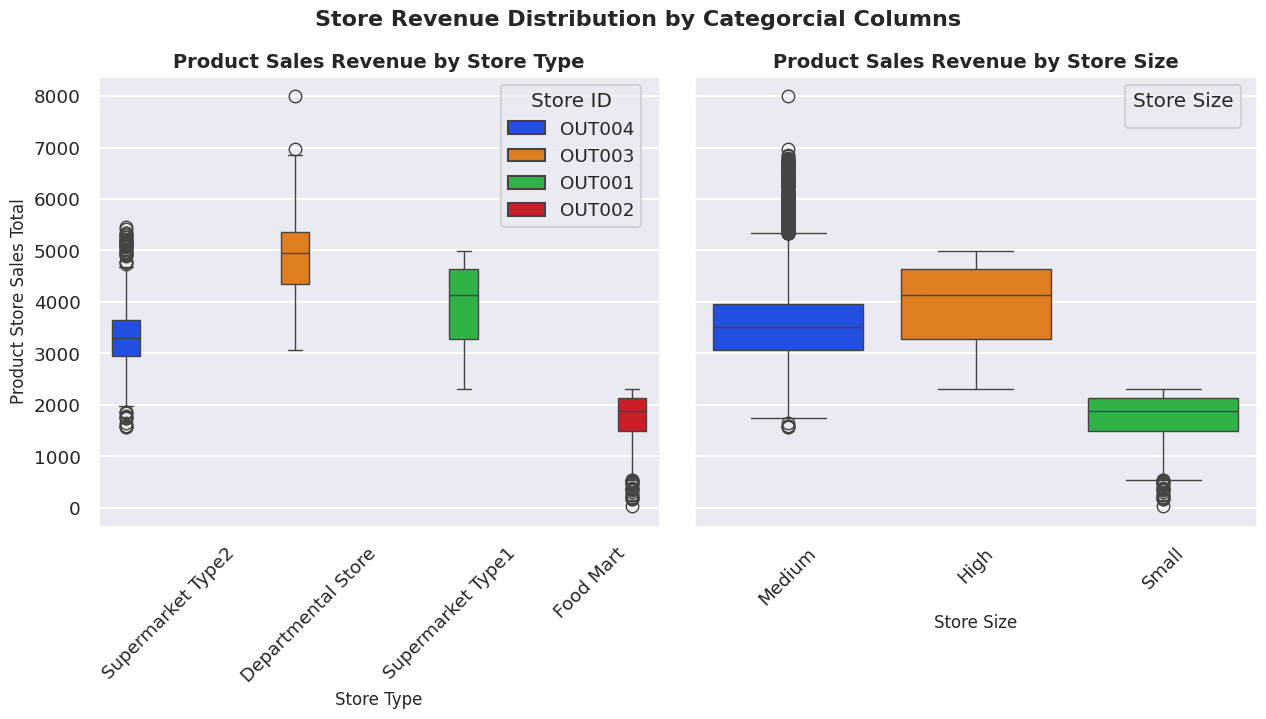

In [446]:
# Set style
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.8)
sns.set_palette("bright")

# Create a figure with two subplots
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(13, 7), sharey=True)

# Plot 1: Store_Type vs Product_Store_Sales_Total
sns.boxplot(
    data=data1,
    x="Store_Type",
    y="Product_Store_Sales_Total",
    hue="Store_Id",
    dodge=True,
    ax=plot1
)
plot1.set_title("Product Sales Revenue by Store Type", fontsize=14, fontweight='bold')
plot1.set_xlabel("Store Type", fontsize=12)
plot1.set_ylabel("Product Store Sales Total", fontsize=12)
plot1.tick_params(axis='x', rotation=45)
plot1.legend(title="Store ID", bbox_to_anchor=(0.70, 1), loc='upper left')

# Plot 2: Store_Size vs Product_Store_Sales_Total
sns.boxplot(
    data=data1,
    x="Store_Size",
    y="Product_Store_Sales_Total",
    hue="Store_Size",
    dodge=False,
    ax=plot2
)
plot2.set_title("Product Sales Revenue by Store Size", fontsize=14, fontweight='bold')
plot2.set_xlabel("Store Size", fontsize=12)
plot2.tick_params(axis='x', rotation=45)
plot2.legend(title="Store Size", bbox_to_anchor=(0.75, 1), loc='upper left')

# Final layout adjustments
plt.tight_layout()
plt.suptitle("Store Revenue Distribution by Categorcial Columns", fontsize=16, fontweight='bold', y=1.03)
plt.show()

### **Products_Weight by Product Type**

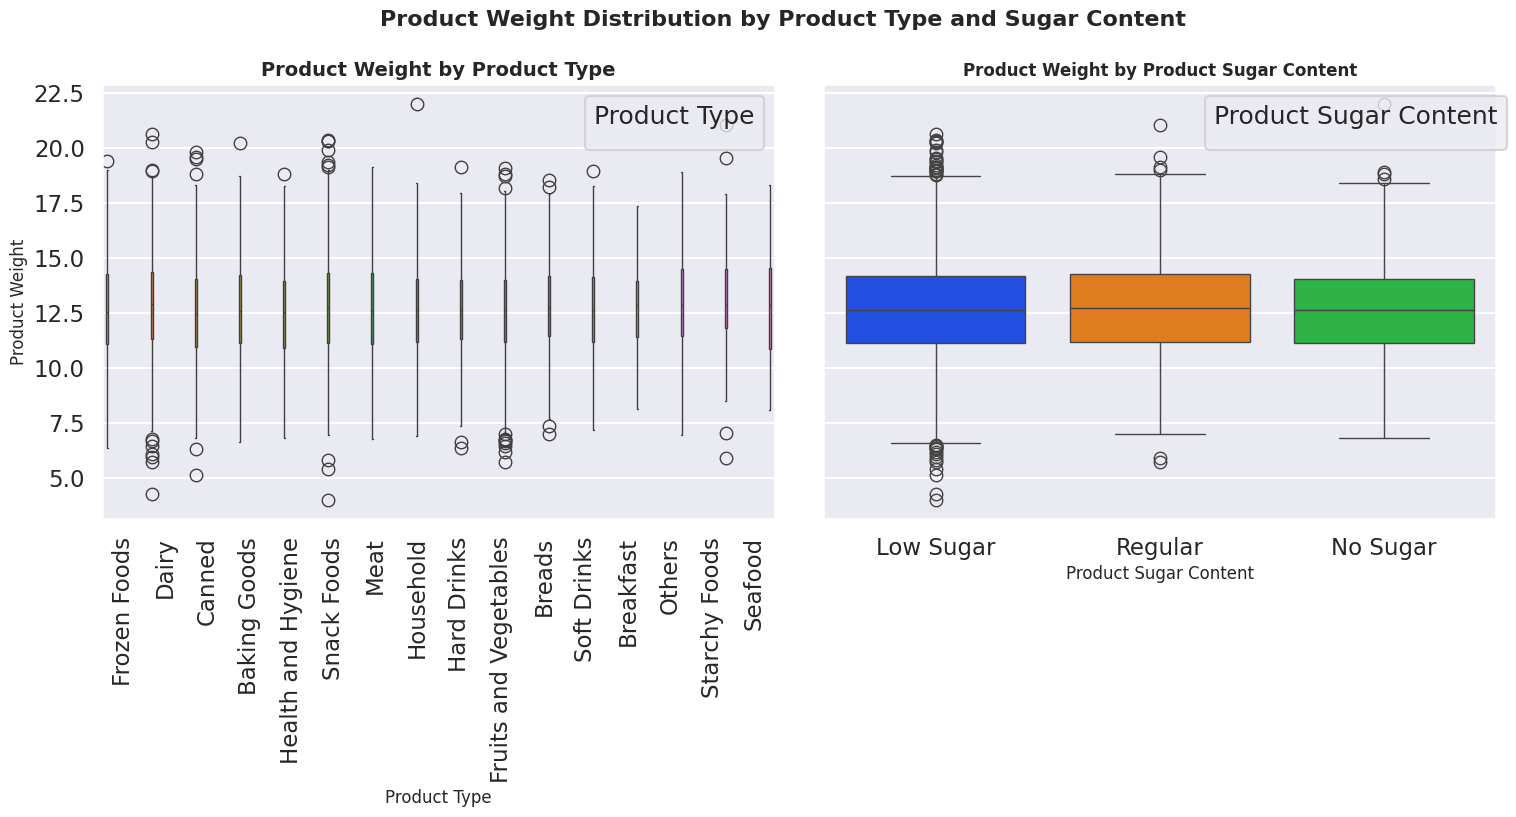

In [447]:
# Set style
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1.0)
sns.set_palette("bright")

# Create a figure with two subplots
fig, (plot1, plot2) = plt.subplots(1,2,figsize=(16,8), sharey=True)

# Plot 1: Product Type vs Product Weight
sns.boxplot(
    data=data1,
    x="Product_Type",
    y="Product_Weight",
    hue="Product_Type",
    dodge=True,
    ax=plot1
)
plot1.set_title("Product Weight by Product Type", fontsize=14, fontweight='bold')
plot1.set_xlabel("Product Type", fontsize=12)
plot1.set_ylabel("Product Weight", fontsize=12)
plot1.tick_params(axis='x', rotation=90)
plot1.legend(title="Product Type", bbox_to_anchor=(0.70, 1), loc='upper left')

# Plot 2: Product_Sugar_Content vs Product_Weight
sns.boxplot(
    data=data1,
    x="Product_Sugar_Content",
    y="Product_Weight",
    hue="Product_Sugar_Content",
    dodge=False,
    ax=plot2
)
plot2.set_title("Product Weight by Product Sugar Content", fontsize=12, fontweight='bold')
plot2.set_xlabel("Product Sugar Content", fontsize=12)
plot2.tick_params(axis='x', rotation=0)
plot2.legend(title="Product Sugar Content", bbox_to_anchor=(0.55, 1), loc='upper left')

# Final layout adjustments
plt.tight_layout()
plt.suptitle("Product Weight Distribution by Product Type and Sugar Content", fontsize=16, fontweight='bold', y=1.03)
plt.show()

### **Product Types Sales Amount by Store Type or Store ID**

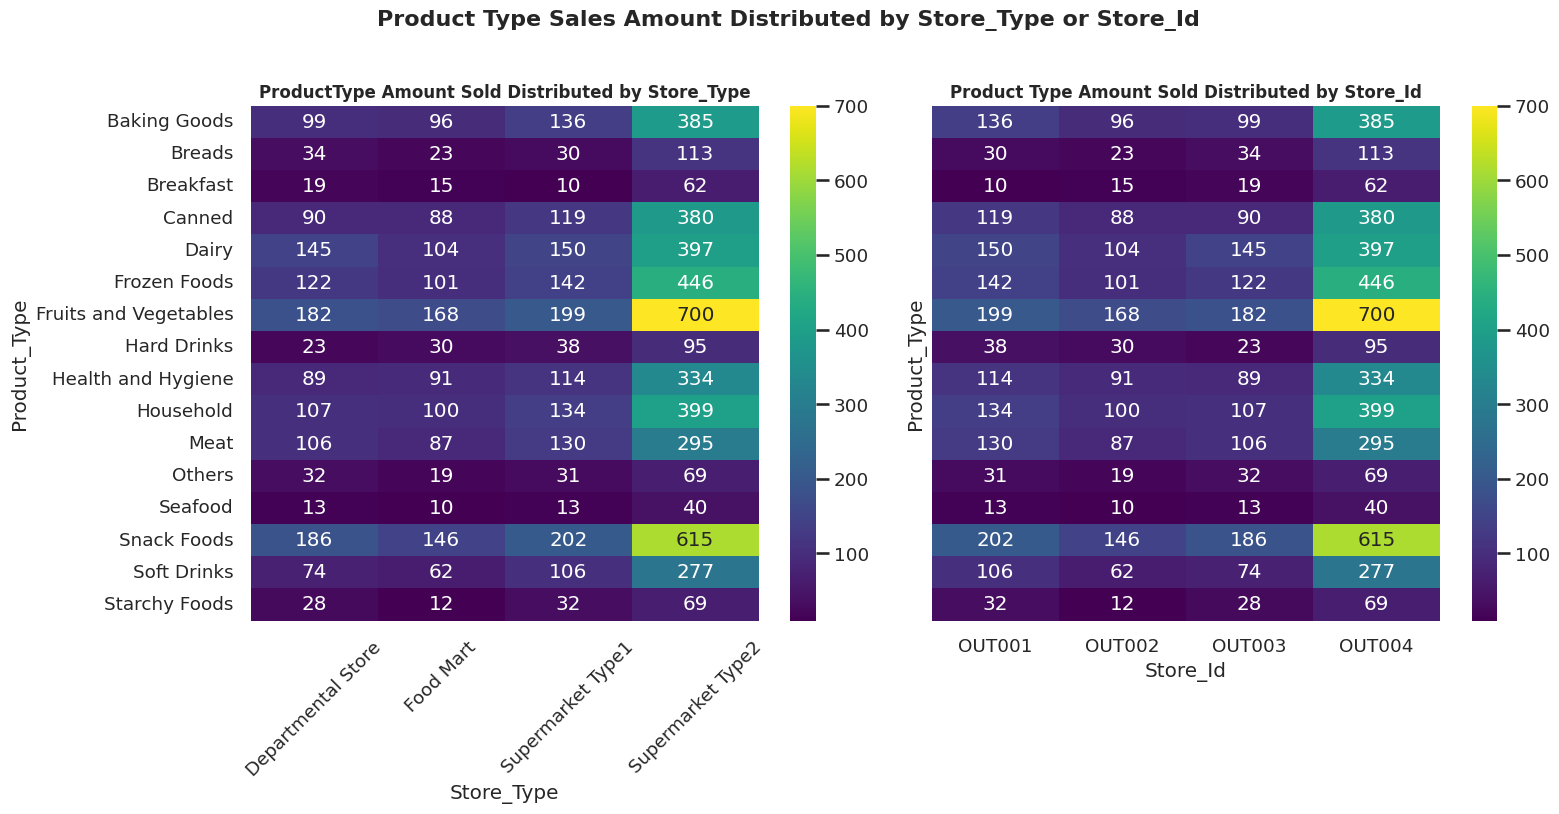

In [448]:
# Set style
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.8)
sns.set_palette("bright")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)  # Two heatmaps side by side

# First heatmap: Store_Type vs Product_Type
sns.heatmap(
    pd.crosstab(data["Product_Type"], data["Store_Type"]),
    annot=True,
    fmt="g",
    cmap="viridis",
    ax=axes[0]
)
axes[0].set_ylabel("Product_Type")
axes[0].set_xlabel("Store_Type")
axes[0].set_title("ProductType Amount Sold Distributed by Store_Type", fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Second heatmap: Store_ID vs Product_Type
sns.heatmap(
    pd.crosstab(data["Product_Type"], data["Store_Id"]),
    annot=True,
    fmt="g",
    cmap="viridis",
    ax=axes[1]
)
axes[1].set_ylabel("Product_Type")
axes[1].set_xlabel("Store_Id")
axes[1].set_title("Product Type Amount Sold Distributed by Store_Id", fontsize=12, fontweight='bold')

# Final layout adjustments
plt.suptitle("Product Type Sales Amount Distributed by Store_Type or Store_Id",fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

## **Comments and Observation**
1. OUT004(SupermarketType2) sell the max of almost all product types.
2. The max items sold are Fruits&Vegetables followed by Snack Foods
3. The Least Items sold are Seafood and Breakfast items
4. OUT002(FoodMart) sell the least seafood, while OUT001(supermarketType1) sell the least Breakfast Items
5. OUT001 is a Supermarket Type1; OUT002 is a FoodMart; OUT003 is a Departmental Store; OUT004 is a Supermarket Type2


### **Analyse the Product Price (MRP) trend by Product Types and Store IDs**

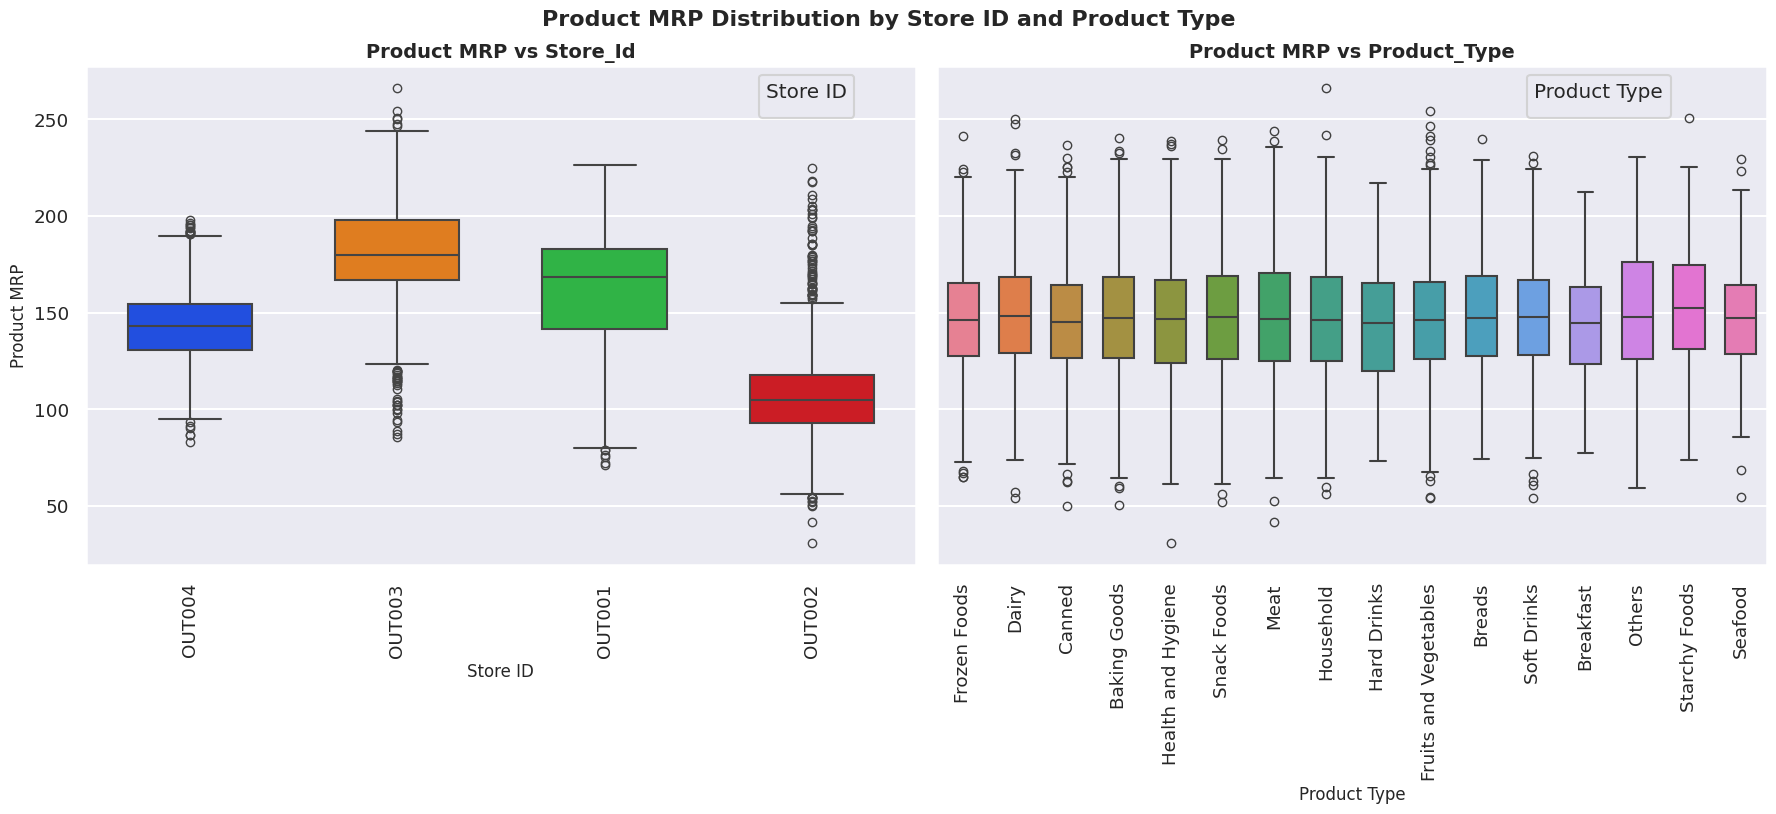

In [449]:

# Set style
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.8)
sns.set_palette("bright")

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Boxplot 1: Store_Id vs Product_MRP
sns.boxplot(
    data=data,
    x="Store_Id",
    y="Product_MRP",
    hue="Store_Id",
    ax=axes[0],
    width=0.6,
    linewidth=1.5,
    flierprops=dict(marker='o', markersize=6)
)
axes[0].set_title("Product MRP vs Store_Id", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Store ID", fontsize=12)
axes[0].set_ylabel("Product MRP", fontsize=12)
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title="Store ID", bbox_to_anchor=(0.8, 1), loc='upper left')

# Boxplot 2: Product_Type vs Product_MRP
sns.boxplot(
    data=data,
    x="Product_Type",
    y="Product_MRP",
    hue="Product_Type",
    ax=axes[1],
    width=0.6,
    linewidth=1.5,
    flierprops=dict(marker='o', markersize=6)
)
axes[1].set_title("Product MRP vs Product_Type", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Product Type", fontsize=12)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title="Product Type", bbox_to_anchor=(0.7, 1), loc='upper left')

# Final layout adjustments
plt.suptitle("Product MRP Distribution by Store ID and Product Type", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## **Comments and Observation**
1. OUT3(Departmental Store) has the Highest median MRP; broader MRP spread and more high-end outliers.**
2. OUT2(Food Mart) has the Lowest median MRP; tighter pricing range**

## **Individual Store Deep Dive Analysis.**

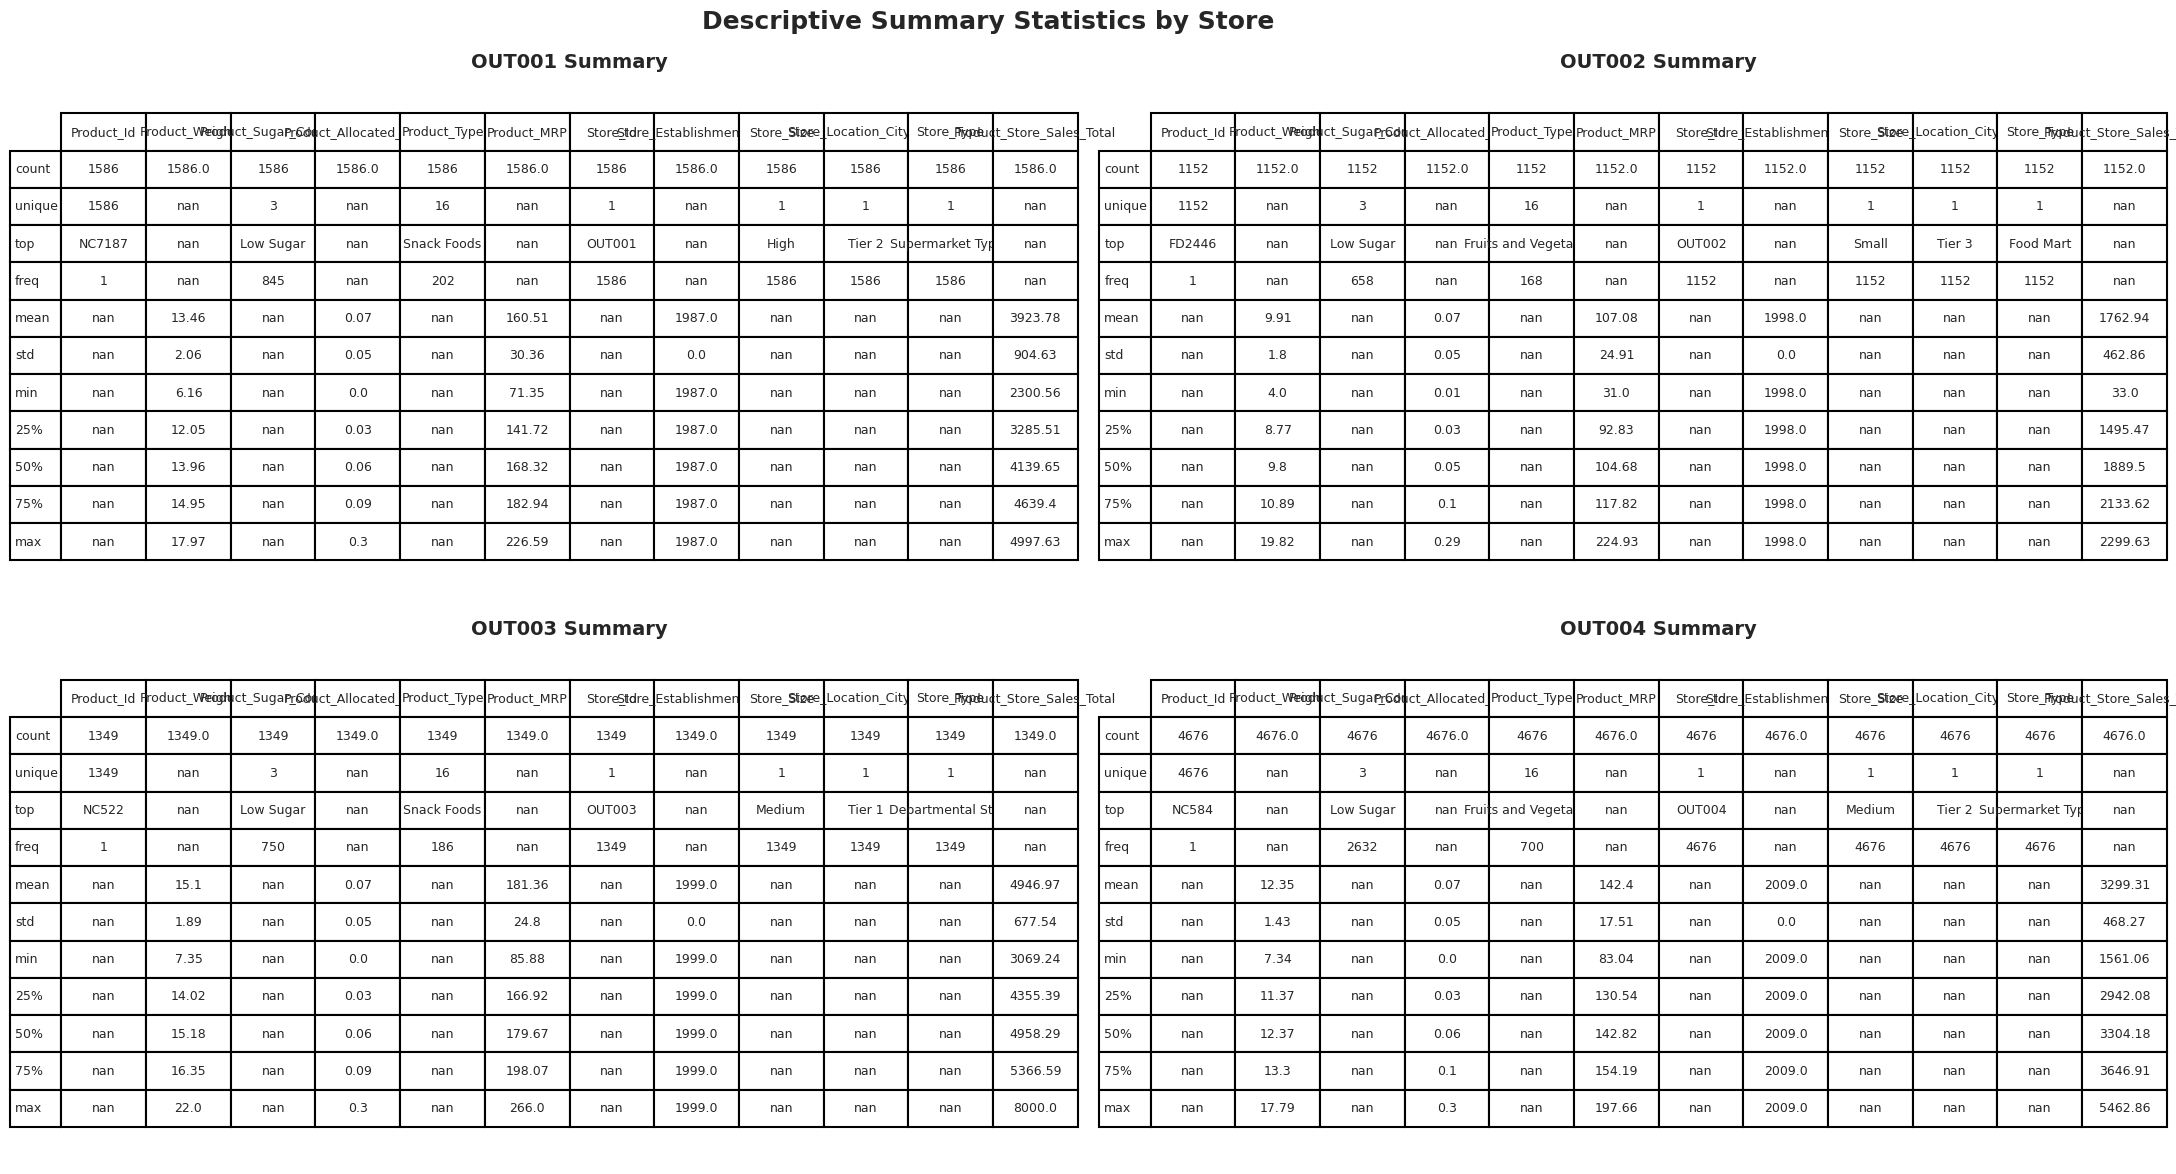

In [450]:
##Generatev a 2x2 summary statisttic for all Store-ID
# Store IDs
store_ids = ["OUT001", "OUT002", "OUT003", "OUT004"]

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharey=True)
axes = axes.flatten()

# Loop through each store and display describe output
for i, store_id in enumerate(store_ids):
    df_desc = data1.loc[data1["Store_Id"] == store_id].describe(include="all")

    # Convert to string for display
    table_data = df_desc.round(2).astype(str)

    # Plot table
    axes[i].axis("off")
    axes[i].set_title(f"{store_id} Summary", fontsize=14, fontweight="bold")
    table = axes[i].table(
        cellText=table_data.values,
        colLabels=table_data.columns,
        rowLabels=table_data.index,
        loc="center",
        cellLoc="center"
    )
    table.scale(1, 1.8)
    table.auto_set_font_size(False)
    table.set_fontsize(9)

# Final layout
fig.suptitle("Descriptive Summary Statistics by Store", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1.1, 1]) #Spacing for subtitles
plt.show()

## **Comments and Observations- OUT001**##
1. OUT001 is a store of Supermarket Type 1 which is located in a Tier 2 city, Store Size is HIgh, It was established in 1987.
2. OUT001 has sold products whose MRP range from 71.35 to 226.59.
3. The highest frequency product is Snack Food, and Low Sugar content items sell the most in OUT001
4. The revenue generated from each product at OUT001 ranges from 2300.56 to 4997.63**

## **Comments and Observations- OUT002**##
1. OUT002 is a Tier-3 Foodmart with small store size and established in 1998.
2. OUT002 has sold products whose MRP range from 31.0 to 224.93
3. The highest frequency product is Fruit and Vegetables Snack Food, and Low Sugar content items sell the most in OUT002
4. The revenue generated from each product at OUT002 ranges from 33 to 2299.63**

## **Comments and Observations- OUT003**##
1. OUT003 is a Tier-1 Departmental Store with MEDIUM store size and established in 1999.
2. OUT003 has sold products whose MRP range from 85.88 to 266
3. The highest frequency product is Snack Food, and Low Sugar content items sell the most in OUT003
4. The revenue generated from each product at OUT003 ranges from 3069.24 to 8000**

## **Comments and Observations- OUT004**##
1. OUT004 is a Tier-2 Supermarket Type-2 store with MEDIUM store size and established in 2009.
2. OUT004 has sold products whose MRP range from 83.04 to 197.66
3. The highest frequency product is Fruits and Vegetables, and Low Sugar content items sell the most in OUT004
4. The revenue generated from each product at OUT004 ranges from 1561.06 to 5462.86**

In [451]:
# Calculate total sales revenue for each store
total_OUT001 = data1.loc[data1["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()
total_OUT002 = data1.loc[data1["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()
total_OUT003 = data1.loc[data1["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()
total_OUT004 = data1.loc[data1["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

# Print results
print("Total Sales Revenue for OUT001:", total_OUT001)
print("Total Sales Revenue for OUT002:", total_OUT002)
print("Total Sales Revenue for OUT003:", total_OUT003)
print("Total Sales Revenue for OUT004:", total_OUT004)

Total Sales Revenue for OUT001: 6223113.18
Total Sales Revenue for OUT002: 2030909.72
Total Sales Revenue for OUT003: 6673457.57
Total Sales Revenue for OUT004: 15427583.43


## **Comments and Observations**
1. Order of Revenue Generated by Store OUT004 > OUT003 > OUT001 > OUT002
2. Highest is OUT004 = 15,427,583.43 and lowest is OUT002 = 2,030,909.72

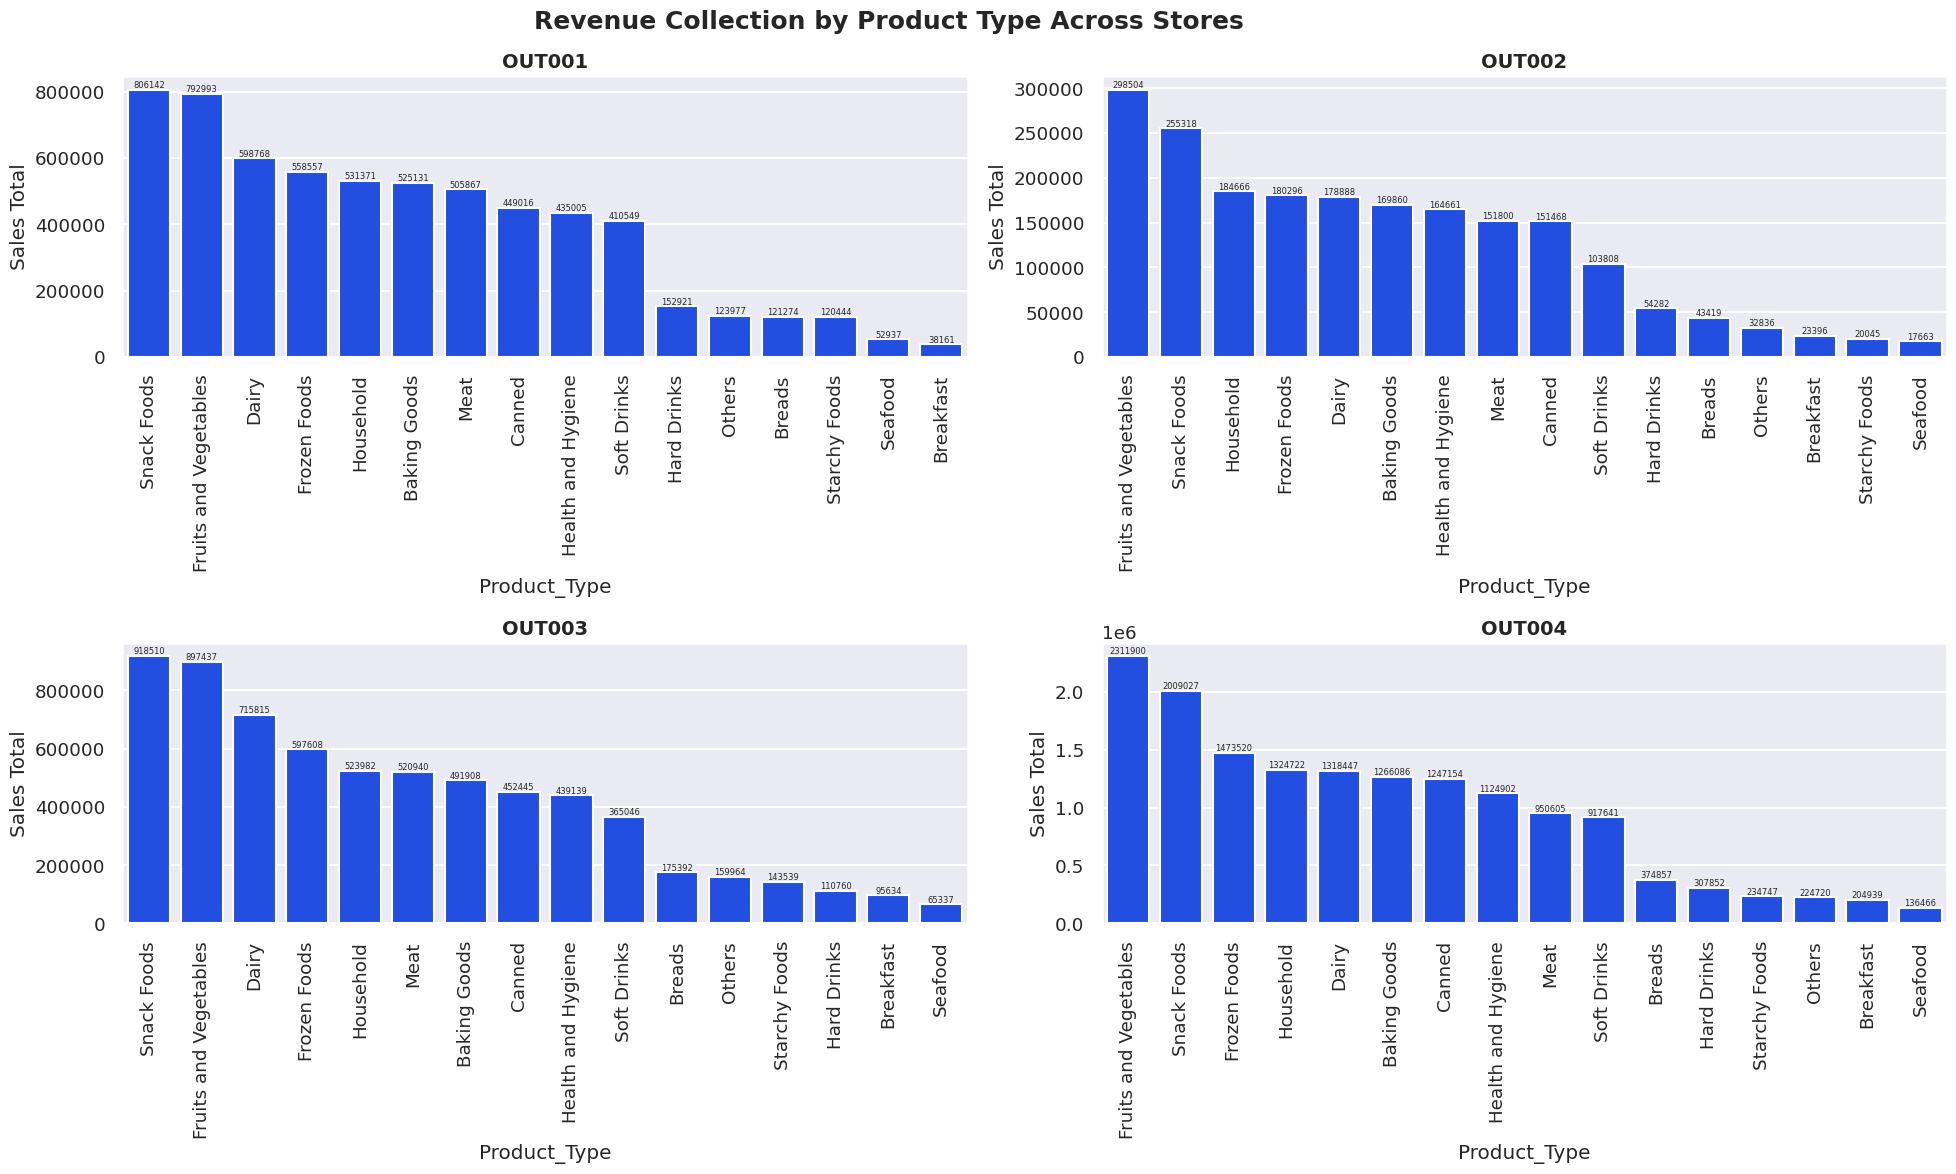

In [452]:
#Generate Histogram plot by Store Sales on a 2x2 grid for all 4 Store Ids
# Set global style
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.8)
sns.set_palette("bright")

# List of store IDs
store_ids = ["OUT001", "OUT002", "OUT003", "OUT004"]

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten to easily index

# Loop through each store and plot
for i, store_id in enumerate(store_ids):
    df = (
        data1.loc[data1["Store_Id"] == store_id]
        .groupby("Product_Type", as_index=False)["Product_Store_Sales_Total"]
        .sum()
        .sort_values("Product_Store_Sales_Total", ascending=False)
    )

    ax = axes[i]
    sns.barplot(x="Product_Type", y="Product_Store_Sales_Total", data=df, ax=ax)
    ax.set_title(f"{store_id}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Product_Type")
    ax.set_ylabel("Sales Total")
    ax.tick_params(axis='x', rotation=90)

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=6)

# Final layout adjustments
fig.suptitle("Revenue Collection by Product Type Across Stores", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1.1, 1])  # Spacing for subtitles
plt.show()

## **Comments and Observations- OUT001**##
1. OUT001 has generated the highest revenue from the sale of Snack  Food followed by fruits&Vegetables
2. Snack food have grossed 806142 in revenue while Fruits and Vegetables have grossed 792993 in revenue .
3. The least frequent revenue item in OUT001 is Breakfast Item and then seafood with 38161 and 53937 in sales resepctively

## **Comments and Observations- OUT002**##
1. OUT002 has generated the highest revenue from the sale of fruits and vegetables followed snack foods.
2. Fruits and Vegetables have grossed 298504 while Snack food have grossed 255311 in revenue.
3. The least frequent revenue item in OUT002 is Seafood and then Starchy food with 17663 and 20045 in sales resepctively

## **Comments and Observations- OUT003**##
1. OUT003 has generated the highest revenue from the sale of Snack  Food and fruits&Vegetables
2. Snack food have grossed 918510 in revenue while Fruits and Vegetables have grossed 897437 in revenue .
3. The least frequent revenue item in OUT001 is Seafood Item and then Breakfast with 65337 and 95634 in sales resepctively

## **Comments and Observations- OUT004**##
1. OUT004 has generated the highest revenue from the sale of fruits and vegetables followed snack foods.
2. Fruits and Vegetables have grossed 2311900 in revenue while Snack Food have grossed 2009027 in revenue .
3. The least frequent revenue item in OUT004 is Seafood Item and then Breakfast with 136466 and 204939 in sales resepctively

**Revenue generated by the stores from each of the product types**.

In [453]:
#group product data1 by product type and store ID and aggregate sum of sales
dfxx = data1.groupby(["Product_Type","Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
# Pivot the DataFrame to get Store_id as index and Product_Type as columns
dfxx_pivot = dfxx.pivot_table(index='Store_Id', columns='Product_Type', values='Product_Store_Sales_Total')

# Round values and fill missing with 0 and reshape into matrix
dfxx_pivot = dfxx_pivot.fillna(0).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Style: highlight maximum as green and minimu as coral and use 9 font size
styled = dfxx_pivot.style.highlight_max(axis=0, color='lightgreen')\
                            .highlight_min(axis=0, color='lightcoral')\
                            .set_properties(**{'font-size': '9pt'})\
                            .set_table_styles([
                                {'selector': 'td', 'props': [('padding', '2px')]},
                                {'selector': 'th', 'props': [('padding', '4px'), ('font-size', '9pt')]},
                                {'selector': 'table', 'props': [('width', '80%')]}
                            ])
styled

Product_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Store_Id,,,,,,,,,,,,,,,,
OUT001,525131.040000,121274.090000,38161.100000,449016.380000,598767.620000,558556.810000,792992.590000,152920.740000,435005.310000,531371.380000,505867.280000,123977.090000,52936.840000,806142.240000,410548.690000,120443.980000
OUT002,169860.500000,43419.470000,23396.100000,151467.660000,178888.180000,180295.950000,298503.560000,54281.850000,164660.810000,184665.650000,151800.010000,32835.730000,17663.350000,255317.570000,103808.350000,20044.980000
OUT003,491908.200000,175391.930000,95634.080000,452445.170000,715814.940000,597608.420000,897437.460000,110760.300000,439139.180000,523981.640000,520939.680000,159963.750000,65337.480000,918510.440000,365046.300000,143538.600000
OUT004,1266086.260000,374856.750000,204939.130000,1247153.500000,1318447.300000,1473519.650000,2311899.660000,307851.730000,1124901.910000,1324721.500000,950604.970000,224719.730000,136466.370000,2009026.700000,917641.380000,234746.890000


## **Comments and Observations**
1. In all product type OUT4 is green all though i.e having maximum revenue per product types.
2. In all the product types, the revenue generated by OUT002 is the lowest which seems reasonable as it is small store in a Tier 3 city.

**Revenue generated by the stores from products having different levels of sugar content**.

In [454]:
# Group product data by product type and sugar content, aggregate sales
dfx = data1.groupby(["Product_Type", "Product_Sugar_Content"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()

# Pivot the DataFrame
dfx_pivot = dfx.pivot_table(index='Product_Sugar_Content', columns='Product_Type', values='Product_Store_Sales_Total')

# Round values and fill missing with 0
dfx_pivot = dfx_pivot.fillna(0).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Style: highlight max/min and reduce font size
styled = dfx_pivot.style.highlight_max(axis=0, color='lightgreen')\
                            .highlight_min(axis=0, color='lightcoral')\
                            .set_properties(**{'font-size': '9pt'})\
                            .set_table_styles([
                                {'selector': 'td', 'props': [('padding', '2px')]},
                                {'selector': 'th', 'props': [('padding', '4px'), ('font-size', '9pt')]},
                                {'selector': 'table', 'props': [('width', '80%')]}
                            ])
styled

Product_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Product_Sugar_Content,,,,,,,,,,,,,,,,
Low Sugar,1591969.610000,527375.150000,220650.920000,1358994.280000,2106150.180000,1825909.910000,2937879.590000,424646.410000,0.000000,0.000000,1279103.330000,0.000000,170472.960000,2759384.130000,1270074.170000,350795.160000
No Sugar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2163707.210000,2564740.170000,0.000000,541496.300000,0.000000,0.000000,0.000000,0.000000
Regular,861016.390000,187567.090000,141479.490000,941088.430000,705767.860000,984070.920000,1362953.680000,201168.210000,0.000000,0.000000,850108.610000,0.000000,101931.080000,1229612.820000,526970.550000,167979.290000


Comments and Observations
1. Most of the highest sales comes from Low Sugar Products (green as max)
2. Most of the lowest sales comes from the NO Sugar Products (coral as min)

# **Data Preprocessing**

1. Replacing the values in the Product_Sugar_Content column was DONE Earlier
2. Data had become Data1 with updated sugar category reg as regular, no further action needed

## **Exploring Patterns in Product_IDs**

1. We can see separate product_ID but the first two character for understander further commonalities.
2. The Product_ID Character will give more information
3. Since it would have fewer unique rows that can be easily modelled.
4. with better information than Product_ID which has each row being unique

In [455]:
## extract the first two characters from the Product_Id column and storing it in another column
data1["Product_Id_char"] = data1["Product_Id"].str[:2]
data1.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [456]:
data1["Product_Id_char"].unique() # looaking into the uniqueness of new character column

array(['FD', 'NC', 'DR'], dtype=object)

In [457]:
data1.loc[data1.Product_Id_char == "FD", "Product_Type"].unique() # Lsit the unique product Type that have ID Character FD

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [458]:
data1.loc[data1.Product_Id_char == "NC", "Product_Type"].unique() # Lsit the unique product Type that have ID Character NC

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

In [459]:
data1.loc[data1.Product_Id_char == "DR", "Product_Type"].unique() # Lsit the unique product Type that have ID Character DR

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

## **Store's Age**

1. Store's Age May be more relevant than store year of establishment.
2. Olderage may translate to Trustworthiness or customer base established
3. Younger age may translate to dynamism, state-of-the-art amennities etc.
4. We will add a new age column and remove Establishment year down the line, using the relevant column (Age)

In [460]:
# Calculate Outlet Age
data1["Store_Age_Years"] = 2025 - data.Store_Establishment_Year
data1.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,16
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,26
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,38
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,38
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,27


## **Grouping Product Types into Perishables and Non-Perishables.**

1. We have 16 different product types in our dataset.
2. We can further group food type to create a column with lesser number unique rows
3. A good grouping would be Perishable and Non-Perishable

In [461]:
#Defining perishable goods based on existing product group
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [462]:
# Define Non-Perishable food as everything else
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"

In [463]:
data1['Product_Type_Cat'] = data1['Product_Type'].apply(change) #add new category column to track the prodcut type

In [464]:
data1.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Cat
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Perishables
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,26,Perishables
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Perishables
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Perishables
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,27,Non Perishables


## **Outlier Check**

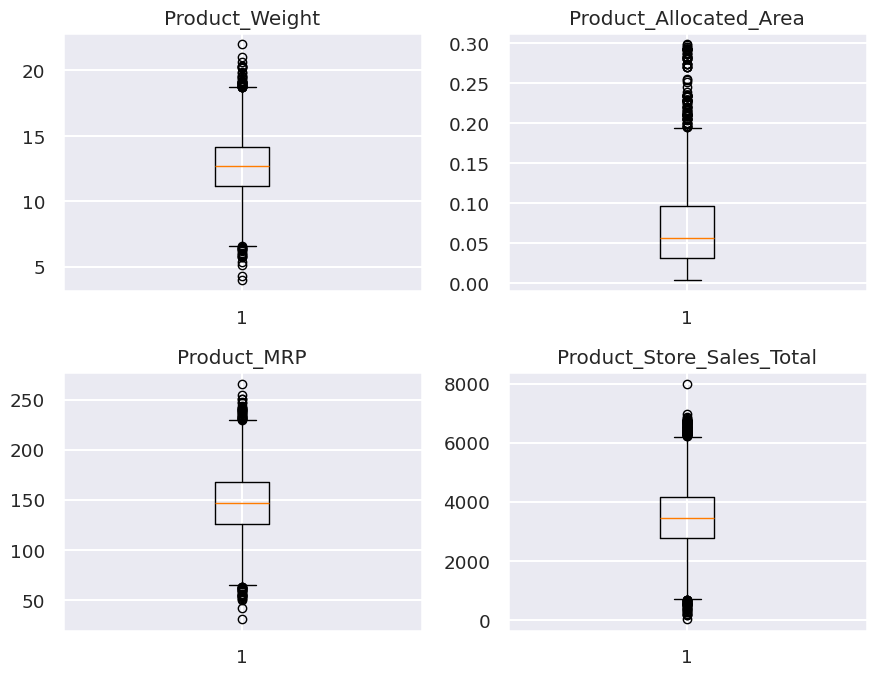

In [465]:
# outlier detection using boxplot
numeric_columns = data1.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize=(9, 7))

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## **Data Preparation for Modeling**

- Target varibale is the total revenue or sales total
- We need to drop unnnecessary feature and encode  the categorical features.
- Then we can do train, test and validation split to evaluate model performance.

In [466]:
data1.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Cat
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Perishables
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,26,Perishables
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Perishables
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Perishables
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,27,Non Perishables


In [467]:
data1.shape

(8763, 15)

Let's remove the columns that are not required.

In [468]:
data2 = data1.drop(["Product_Id","Product_Type", "Store_Id", "Store_Establishment_Year"], axis=1)

In [469]:
data2.shape

(8763, 11)

In [470]:
data2.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Cat
0,12.66,Low Sugar,0.027,117.08,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Perishables
1,16.54,Low Sugar,0.144,171.43,Medium,Tier 1,Departmental Store,4830.02,FD,26,Perishables
2,14.28,Regular,0.031,162.08,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Perishables
3,12.10,Low Sugar,0.112,186.31,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Perishables
4,9.57,No Sugar,0.010,123.67,Small,Tier 3,Food Mart,2279.36,NC,27,Non Perishables


In [471]:
# Separating features and the target column
X = data2.drop("Product_Store_Sales_Total", axis=1) # Drop Target Variable from independent varibale X
y = data2["Product_Store_Sales_Total"] #Place Target variable ad dependent varibale y

In [472]:
# Splitting the dataset into the Temp (training and validation) and Testing set.
X_temp, X_test, y_temp, y_test = train_test_split(
 X, y, test_size = 0.25, random_state = 1,shuffle = True) # Split the X and y and obtain test set

In [473]:
# Further split the Temp Data into Train and Validation Data with a ratio of 7:3
X_train, X_val,y_train,y_val = train_test_split(
    X_temp,y_temp,test_size=0.3,random_state=1,shuffle = True
)

In [474]:
###Print The shape of the new split data set to see the number of rows
print('X_train Shape =', X_train.shape)
print('X_val Shape =',X_val.shape)
print('X_test Shape =',X_test.shape)

X_train Shape = (4600, 10)
X_val Shape = (1972, 10)
X_test Shape = (2191, 10)


In [475]:
###Print The shape of the new split data set to see the number of rows
print('y_train Shape =', y_train.shape)
print('y_val Shape =',y_val.shape)
print('y_test Shape =',y_test.shape)

y_train Shape = (4600,)
y_val Shape = (1972,)
y_test Shape = (2191,)


### **Data Pre-processing Pipeline**

In [476]:
#Extract the column of object or category class and convert to python list
categorical_features = data2.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['Product_Sugar_Content',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type',
 'Product_Id_char',
 'Product_Type_Cat']

In [477]:
# Create a preprocessing pipeline for the categorical features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
)

# **Model Building**

## Define functions for Model Evaluation

1. We will fit different models on the train data and observe their performance on validation data set.
2. We will run few ML models and their hyperparameter tuning ML
(DTree, Random Forest, Gradient Bosting and XGBoost)
3. We will pick the best ML model based on comparing for our use and finaly run on test data
4. GridSearchCv  would be used for for hyperparameter tuning and `r_2 score` for model optimization
5. R-square - `Coefficient of determination` would be used to evaluate the performance of a regression model.
6. First we create functions to for Model scoring below.

In [478]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

# **Model-1 Decision Tree**

In [479]:
# Using Decison Tree Regressor

dtree = DecisionTreeRegressor(random_state=1) # random state ensure reproducibility
dtree = make_pipeline(preprocessor,dtree) # uses one one encoding to transform categorical feature
dtree.fit(X_train, y_train) #trains transformed data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Cat'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=1))])

 ### Model-1 Model performance on trainning set

In [480]:
dtree_model_train_perf = model_performance_regression(dtree, X_train, y_train)
dtree_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,589.453575,463.422606,0.691445,0.690773,0.164519


 ### Model-1 Model performance on validation set

In [481]:
dtree_model_val_perf = model_performance_regression(dtree, X_val, y_val)
dtree_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,613.454869,482.287046,0.671647,0.669973,0.195942


# **Model-2 Random Forest**

In [482]:
# Using Random forest regressor

rf_estimator = RandomForestRegressor(random_state=1) #random state ensure reproducibility
rf_estimator = make_pipeline(preprocessor,rf_estimator) # applies onehot encodint to categorical features
rf_estimator.fit(X_train, y_train) #trains the transformed data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Cat'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

 ### Model-2 Model performance on trainning set

In [483]:
#random forest regressor model perfromance evaluation on training set

rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,589.477952,463.368145,0.69142,0.690747,0.16448


### Model-2 Model performacne on Validation data

In [484]:
#random forest regressor model perfromance evaluation on validation set

rf_estimator_model_val_perf = model_performance_regression(rf_estimator, X_val, y_val)
rf_estimator_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,613.550181,482.356256,0.671545,0.66987,0.196031


# **Model-3 Gradient Boosting**

In [485]:
# Using Gradientboost regressor

gb_estimator = GradientBoostingRegressor(random_state=1) #random state ensure reproducibility
gb_estimator = make_pipeline(preprocessor,gb_estimator) # applies onehot encodint to categorical features
gb_estimator.fit(X_train, y_train) #trains the transformed data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Cat'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])

### Model-3 Model performance on Training data

In [486]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train, y_train)
gb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,589.492786,463.4501,0.691404,0.690732,0.164532


### Model-3 Model performance on Validation data

In [487]:
gb_estimator_model_val_perf = model_performance_regression(gb_estimator, X_val, y_val)
gb_estimator_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,613.349716,482.211573,0.67176,0.670086,0.195945


# **Model-4 XG Boost**

In [488]:
# Using XGBOOST

xgb_estimator = XGBRegressor(random_state=1) #random state ensure reproducibility
xgb_estimator = make_pipeline(preprocessor,xgb_estimator) # applies onehot encodint to categorical features
xgb_estimator.fit(X_train, y_train) #trains the transformed data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Cat'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsamp...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

### Model-4 Model performance on Training data

In [489]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
xgb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,589.453575,463.422623,0.691445,0.690773,0.164519


### Model-4 Model performance on Validation data

In [490]:
xgb_estimator_model_val_perf = model_performance_regression(xgb_estimator, X_val, y_val)
xgb_estimator_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,613.454871,482.287068,0.671647,0.669973,0.195942


# **Model Performance Improvements With HyperParamater Tuning**

# **Model-5 Decision Tree With HyperParameter Tuning**

In [491]:
# Using Decison Tree with HyperParameter Tunings

# # Choose the type of classifier.
dtree_tuned = DecisionTreeRegressor(random_state=1)
dtree_tuned = make_pipeline(preprocessor,dtree_tuned)

# # Grid of parameters to choose from
parameters = {
     "decisiontreeregressor__max_depth": list(np.arange(5,8)),
     "decisiontreeregressor__min_samples_leaf": [3,4],
     "decisiontreeregressor__max_leaf_nodes": [8,10,11],
     "decisiontreeregressor__min_impurity_decrease": [0.01,0.05, 0.1],
 }

# # Run the grid search CV
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=r2_score, cv=3, n_jobs =-1)
grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Cat'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=np.int64(5), max_leaf_nodes=8,
                                       min_impurity_decrease=0.01,
                                       min_samples_leaf=3, random_state=1))])

### Model-5 Model performance on Training set

In [492]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train, y_train)
dtree_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,589.833585,463.772494,0.691047,0.690374,0.164706


 ### Model-5 Model performance on validation set

In [493]:
dtree_tuned_model_val_perf = model_performance_regression(dtree_tuned, X_val, y_val)
dtree_tuned_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,613.135449,481.77157,0.671989,0.670316,0.195643


In [494]:
# Best Parameter from Fit
best_params = grid_obj.best_params_

# Display the best parameters
print(" Best hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")


 Best hyperparameters found:
decisiontreeregressor__max_depth: 5
decisiontreeregressor__max_leaf_nodes: 8
decisiontreeregressor__min_impurity_decrease: 0.01
decisiontreeregressor__min_samples_leaf: 3


# **Model-6 Random Forest with HyperParamater Tuning**

In [495]:
#Using Random Forest With Hyperparameter Tuning

# choosing the type of classifier.
rf_tuned = RandomForestRegressor(random_state=1)
rf_tuned = make_pipeline(preprocessor,rf_tuned)

X_processed = preprocessor.fit_transform(X_train)
n_features = X_processed.shape[1]

# # Grid of parameters
parameters = {
     "randomforestregressor__max_depth":[3,4,5],
     "randomforestregressor__max_features":[0.80,0.85 ],
     "randomforestregressor__n_estimators": [100,200],
 }

# # Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Cat'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, max_features=0.8,
                                       random_state=1))])

### Model-6 Model performance on Training set

In [496]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,590.15592,464.108747,0.690709,0.690035,0.164718


### Model-6 Model performance on Validation set

In [497]:
rf_tuned_model_val_perf = model_performance_regression(rf_tuned, X_val, y_val)
rf_tuned_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,612.961764,482.130659,0.672175,0.670503,0.19593


In [498]:
# Extract best parameters from grid search
best_params = grid_obj.best_params_

# Display the best parameters
print(" Best hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

 Best hyperparameters found:
randomforestregressor__max_depth: 3
randomforestregressor__max_features: 0.8
randomforestregressor__n_estimators: 100


# **Model-7 Gradient Boosting with HyperParamater Tuning**

In [499]:
#Using Gradient Boosting with hyperparameter tuning


# # Choosing the type of classifier.
gb_tuned = GradientBoostingRegressor(random_state=1)
gb_tuned = make_pipeline(preprocessor,gb_tuned)

# # Grid of parameters to choose from
parameters = {
     "gradientboostingregressor__n_estimators":[80,100,120],
     "gradientboostingregressor__subsample": [0.6, 0.7, 0.8],
     "gradientboostingregressor__max_features": [0.6, 0.7,0.8,],
     "gradientboostingregressor__max_depth": [2,3,5],
 }


# # Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Cat'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=2, max_features=0.6,
                                           n_estimators=80, random_state=1,
                                           subsample=0.6))])

### Model-7 Model performance on Training set

In [500]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train, y_train)
gb_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,589.678845,463.788988,0.691209,0.690536,0.164611


### Model-7 Model performance on Validation set

In [501]:
gb_tuned_model_val_perf = model_performance_regression(gb_tuned, X_val, y_val)
gb_tuned_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,612.941199,481.982942,0.672197,0.670525,0.195541


In [502]:
# Extract best parameters from grid search
best_params = grid_obj.best_params_

# Display the best parameters
print(" Best hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

 Best hyperparameters found:
gradientboostingregressor__max_depth: 2
gradientboostingregressor__max_features: 0.6
gradientboostingregressor__n_estimators: 80
gradientboostingregressor__subsample: 0.6


# **Model-8 XGBoost with HyperParameter Tuning**

In [503]:
#Using XGB with hyperparameter tuning


# # Choosing the type of classifier.
xgb_tuned = XGBRegressor(random_state=1)
xgb_tuned = make_pipeline(preprocessor,xgb_tuned)

# # Grid of parameters to choose from
parameters = {
   "xgbregressor__n_estimators": [80,100], #Number of boosting rounds. More = better fit, but slower and risk of overfitting.
    "xgbregressor__subsample": [0.5,0.6], #Fraction of training samples used per tree. Lower = more randomness, better generalization.
    "xgbregressor__gamma": [0, 0.01, 0.05], #Minimum loss reduction required to make a split. Higher = more conservative tree growth.
    "xgbregressor__colsample_bytree": [0.5,0.6, 0.8, 1.0], #Fraction of features used per tree. Lower = more regularization.
    "xgbregressor__colsample_bylevel": [0.5, 0.6, 0.8, 1.0], #Fraction of features used per tree level. Adds another layer of randomness.
}

# # Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Cat'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsamp...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=80, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

### Model-8 Model Performance on Training Set

In [504]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,589.774432,463.758847,0.691109,0.690436,0.164702


### Model-8 Model Performance on Validation Set

In [505]:
xgb_tuned_model_val_perf = model_performance_regression(xgb_tuned, X_val, y_val)
xgb_tuned_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,613.54068,482.108243,0.671555,0.66988,0.195757


In [506]:
# Extract best parameters from grid search
best_params = grid_obj.best_params_

# Display the best parameters
print(" Best hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

 Best hyperparameters found:
xgbregressor__colsample_bylevel: 0.5
xgbregressor__colsample_bytree: 0.5
xgbregressor__gamma: 0
xgbregressor__n_estimators: 80
xgbregressor__subsample: 0.5


# **Model Performance Comparison, Final Model Selection, and Serialization**

In [507]:
 # training and validation performance comparison Table

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_model_val_perf.T,

        rf_estimator_model_train_perf.T,
        rf_estimator_model_val_perf.T,

        gb_estimator_model_train_perf.T,
        gb_estimator_model_val_perf.T,

        xgb_estimator_model_train_perf.T,
        xgb_estimator_model_val_perf.T,

        dtree_tuned_model_train_perf.T,
        dtree_tuned_model_val_perf.T,

        rf_tuned_model_train_perf.T,
        rf_tuned_model_val_perf.T,

        gb_tuned_model_train_perf.T,
        gb_tuned_model_val_perf.T,

        xgb_tuned_model_train_perf.T,
        xgb_tuned_model_val_perf.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree - Train",
    "Decision Tree - Validation",

    "Random Forest (Untuned) - Train",
    "Random Forest (Untuned) - Validation",

    "Gradient Boosting (Untuned) - Train",
    "Gradient Boosting (Untuned) - Validation",

    "XGBoost (Untuned) - Train",
    "XGBoost (Untuned) - Validation",

    "Decision Tree (Tuned) - Train",
    "Decision Tree (Tuned) - Validation",

    "Random Forest (Tuned) - Train",
    "Random Forest (Tuned) - Validation",

    "Gradient Boosting (Tuned) - Train",
    "Gradient Boosting (Tuned) - Validation",

    "XGBoost (Tuned) - Train",
    "XGBoost (Tuned) - Validation"
]

# Style
def highlight_max_min(df):
    return df.style.highlight_max(axis=1, color='lightgreen') \
                   .highlight_min(axis=1, color='lightcoral') \
                   .format("{:.5f}") \
                   .set_caption("Training & Validation Performance Comparison")
# Transpose table and style
#highlight_max_min(models_train_comp_df)

# Transpose the table
transposed_df = models_train_comp_df.T

# highlight max/min per metric column
styled_transposed_df = transposed_df.style \
    .highlight_max(axis=0, color='lightgreen') \
    .highlight_min(axis=0, color='lightcoral') \
    .format("{:.5f}") \
    .set_caption("Training and Validation Model Performance Comparison")

# Display the styled transposed table
styled_transposed_df

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Decision Tree - Train,589.45357,463.42261,0.69145,0.69077,0.16452
Decision Tree - Validation,613.45487,482.28705,0.67165,0.66997,0.19594
Random Forest (Untuned) - Train,589.47795,463.36815,0.69142,0.69075,0.16448
Random Forest (Untuned) - Validation,613.55018,482.35626,0.67155,0.66987,0.19603
Gradient Boosting (Untuned) - Train,589.49279,463.45010,0.69140,0.69073,0.16453
Gradient Boosting (Untuned) - Validation,613.34972,482.21157,0.67176,0.67009,0.19595
XGBoost (Untuned) - Train,589.45357,463.42262,0.69145,0.69077,0.16452
XGBoost (Untuned) - Validation,613.45487,482.28707,0.67165,0.66997,0.19594
Decision Tree (Tuned) - Train,589.83359,463.77249,0.69105,0.69037,0.16471
Decision Tree (Tuned) - Validation,613.13545,481.77157,0.67199,0.67032,0.19564


## **Model Decision: Gradient Boosting With HyperParameter Tuning Model-7**
1. All model have closely match Adjusted R2 for both Training and Validation Set
2. Choosing Gradient Bossting with hyperparameter Tuning
3. Because Validation Adj-R2 is slighlty higher na d close to its training set.

## **Data Folder Directory Management and Serialization**

In [508]:
# Create a folder for storing the files needed for web app deployment
os.makedirs("backend_files", exist_ok=True)

In [509]:
# Define the file path to save (serialize) the trained model along with the data preprocessing steps
saved_model_path = "backend_files/superkart_prediction_model.joblib"

In [510]:
# Save Gradient Boost Model 7 (gb_tuned) model pipeline using joblib
joblib.dump(gb_tuned, saved_model_path)

print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at backend_files/superkart_prediction_model.joblib


In [511]:
import joblib

# Load the saved model pipeline from the file
saved_model = joblib.load(saved_model_path)
#saved_model = joblib.load("/content/backend_files/superkart_prediction_model.joblib" )
# Confirm the model is loaded
print("Model loaded successfully.")

Model loaded successfully.


In [512]:
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Cat'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=2, max_features=0.6,
                                           n_estimators=80, random_state=1,
                                           subsample=0.6))])

## **Model Prediction on Pristine X_Test Data Using Deserialized Model.**

In [513]:
saved_model.predict(X_test) # testing with X_test for inference

array([3289.26951783, 4762.10638607, 4839.11825526, ..., 3292.81859522,
       3289.26951783, 3921.87097198])

**The model can be directly used for making predictions without any retraining.**

## **Model Performance Testing on Unleaked Testing Data Set**

In [514]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
gb_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,621.359331,488.055192,0.662797,0.66125,0.16674


# **Deployment - Backend**

## Setting up a Hugging Face Docker Space for the Backend

In [515]:
from google.colab import userdata
access_token = userdata.get('HF_TOKEN')

In [516]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login

# Login to your Hugging Face account using your access token
# Replace "YOUR_HUGGINGFACE_TOKEN" with your actual token
login(token=access_token)

# Import the create_repo function from the huggingface_hub library
from huggingface_hub import create_repo

In [517]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("SuperkartPredictionBackEnd",  #define the name of the repository
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker" to create docker space
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-68bd127a-2b5e86e5396a5fad594acfac;ca4ec1bb-69a0-4022-8e65-8b815af1ea92)

You already created this space repo


## Flask Web Framework


In [518]:
%%writefile /content/backend_files/app.py

# Import necessary libraries
import numpy as np
import joblib  # For loading the serialized model
import pandas as pd  # For data manipulation
from flask import Flask, request, jsonify  # For creating the Flask API

# Initialize Flask app with a name
superkart_api = Flask("Babatundes Superkart Sales Predictor") #define the name of the app

# Load the trained prediction model
model = joblib.load("superkart_prediction_model.joblib") #define the location of the serialized model

# Define a route for the home page
@superkart_api.get('/')
def home():
    """
    This function handles GET requests to the root URL ('/') of the API.
    It returns a simple welcome message.
    """
    return "Welcome to Babatunde's Superkart Sales Predictor API!" #define a welcome message

# Define an endpoint to predict churn for a single customer
@superkart_api.post('/v1/predict')
def predict_sales():
    """
    This function handles POST requests to the '/v1/predict' endpoint.
    It expects a JSON payload containing property details and returns
    the predicted sales outcome price as a JSON response.
    """
    # Get JSON data from the request
    data = request.get_json()

    # Extract relevant product ans store features from the input data. The order of the column names matters.
    sample = {
        'Product_Weight': data['Product_Weight'],
        'Product_Sugar_Content': data['Product_Sugar_Content'],
        'Product_Allocated_Area': data['Product_Allocated_Area'],
        'Product_MRP': data['Product_MRP'],
        'Store_Size': data['Store_Size'],
        'Store_Location_City_Type': data['Store_Location_City_Type'],
        'Store_Type': data['Store_Type'],
        'Product_Id_char': data['Product_Id_char'],
        'Store_Age_Years': data['Store_Age_Years'],
        'Product_Type_Cat': data['Product_Type_Cat']
    }


    # Convert the extracted data into a DataFrame
    input_data = pd.DataFrame([sample])

    # Make a sales prediction using the trained model
    prediction = model.predict(input_data).tolist()[0]

    # Return the prediction as a JSON response
    return jsonify({'Sales': prediction})

# Define an endpoint for batch prediction (POST request)
@superkart_api.post('/v1/predictbatch')
def predict_sales_batch():
    """
    This function handles POST requests to the '/v1/predictbatch' endpoint.
    It expects a CSV file containing property details for multiple properties
    and returns the predicted rental prices as a dictionary in the JSON response.
    """
    # Get the uploaded CSV file from the request
    file = request.files['file']

    # Read the CSV file into a Pandas DataFrame
    input_data = pd.read_csv(file)

    # Make predictions for all properties in the DataFrame
    predicted_sales = model.predict(input_data).tolist()

    # Return the prediction as a JSON response
    return jsonify({'Sales': predicted_sales})



# Run the Flask app in debug mode
if __name__ == '__main__':
    superkart_api.run(debug=True)

Overwriting /content/backend_files/app.py


## Dependencies File

In [519]:
import os
os.makedirs("backend_files", exist_ok=True)

In [520]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
seaborn==0.13.2
joblib==1.4.2
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.32.3
uvicorn[standard]
streamlit==1.43.2
huggingface_hub==0.20.3
hf_xet

Overwriting backend_files/requirements.txt


## Dockerfile

In [521]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:superkart_api"]

Overwriting backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

## Uploading Files to Hugging Face Space (Docker Space)

In [522]:
# for hugging face space authentication to upload files
from huggingface_hub import HfApi
!pip install -U hf-xet
!pip install -U huggingface_hub
access_key = access_token  #access token NA
repo_id = "admattew/SuperkartPredictionBackEnd"  #define the repo id.


# Initialize the API
api = HfApi(token=access_key)

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/backend_files",
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

  Using cached huggingface_hub-0.34.4-py3-none-any.whl.metadata (14 kB)
Using cached huggingface_hub-0.34.4-py3-none-any.whl (561 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.30.1
    Uninstalling huggingface-hub-0.30.1:
      Successfully uninstalled huggingface-hub-0.30.1


Uploading...:   0%|          | 0.00/105k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/admattew/SuperkartPredictionBackEnd/commit/c272b9f1cdcd37641b617a2e64eea786de08d0f7', commit_message='Upload folder using huggingface_hub', commit_description='', oid='c272b9f1cdcd37641b617a2e64eea786de08d0f7', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/admattew/SuperkartPredictionBackEnd', endpoint='https://huggingface.co', repo_type='space', repo_id='admattew/SuperkartPredictionBackEnd'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

## Streamlit for Interactive UI

In [535]:
%cd /content

/content


In [536]:
# folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [537]:
# !pip install Streamlit

In [538]:
from posix import access
import requests
import os

product_data = {
    "Product_Weight": 15.0,
    "Product_Sugar_Content": "Low Sugar",
    "Product_Allocated_Area": 0.1,
    "Product_MRP": 35,
    "Store_Size": "Medium",
    "Store_Location_City_Type": "Tier 1",
    "Store_Type": "Departmental Store",
    "Product_Id_char": "NC",
    "Store_Age_Years": 15,
    "Product_Type_Cat": "Perishables"
}

response = requests.post("https://admattew-SuperkartPredictionBackEnd.hf.space/v1/predict", json=product_data)    #  user name and space name to correctly define the endpoint
# response = requests.post(url,headers=headers, json=product_data)    #  user name and space name to correctly define the endpoint
if response.status_code == 200:
    result = response.json()
    print(result)
    predicted_sales = result["Sales"]
    print(predicted_sales)
else:
    print(f"Error in API request: {response.status_code}")

# # Section for batch prediction
# st.subheader("Batch Prediction")

# # Allow users to upload a CSV file for batch prediction
# uploaded_file = st.file_uploader("Upload CSV file for batch prediction", type=["csv"])

# # Make batch prediction when the "Predict Batch" button is clicked
# if uploaded_file is not None:
#     if st.button("Predict Batch"):
#         response = requests.post("https://admattew/SuperkartPredictionBackEnd.hf.space/v1/predictbatch",headers=headers, files={"file": uploaded_file})  # Send file to Flask API
#         #response = requests.post("https://huggingface.co/spaces/admattew/SuperkartPredictionBackEnd/endpoint/v1/predicbatch", files={"file": uploaded_file})  # Send file to Flask API
#         if response.status_code == 200:
#             predictions = response.json()
#             st.success("Batch predictions completed!")
#             st.write(predictions)  # Display the predictions
#         else:
#             st.error("Error making batch prediction: {response.status_code}")

{'Sales': 4903.0555736012575}
4903.0555736012575


In [539]:
%%writefile frontend_files/app.py

import streamlit as st
import requests

st.title("Babatundes Superkart Sales Predictor") #title of the app.

# Section for online prediction
st.subheader("Input Product and Store Details for Sales Prediction")

# Input fields for product and store data
Product_Weight = st.number_input("Product Weight", min_value=0.0, value=15.0)
Product_Sugar_Content = st.selectbox("Product Sugar Content", ["Low Sugar", "Regular", "No Sugar"])
Product_Allocated_Area = st.number_input("Product Allocated Area", min_value=0.0, value=0.10)
Product_MRP = st.number_input("Product Maximum Retail Price", min_value=0.10, value=35.00)
Store_Size = st.selectbox("Store Size", ["Small", "Medium", "High"])
Store_Location_City_Type = st.selectbox("Store Location City Type", ["Tier 1", "Tier 2", "Tier 3"])
Store_Type = st.selectbox("Store Type", ["Food Mart","Departmental Store","Supermarket Type1", "Supermarket Type2"])
Product_Id_char = st.selectbox("Product Id Character", ["FD", "NC", "DR"])
Store_Age_Years = st.number_input("Store Age - Years", min_value=0, value=15)
Product_Type_Category = st.selectbox("Product Type Category", ["Perishables", "Non Perishables"])

product_data = {
    "Product_Weight": Product_Weight,
    "Product_Sugar_Content": Product_Sugar_Content,
    "Product_Allocated_Area": Product_Allocated_Area,
    "Product_MRP": Product_MRP,
    "Store_Size": Store_Size,
    "Store_Location_City_Type": Store_Location_City_Type,
    "Store_Type": Store_Type,
    "Product_Id_char": Product_Id_char,
    "Store_Age_Years": Store_Age_Years,
    "Product_Type_Cat": Product_Type_Category
}

if st.button("Predict", type='primary'):
    response = requests.post("https://admattew-SuperkartPredictionBackEnd.hf.space/v1/predict", json=product_data)    #  user name and space name to correctly define the endpoint
    if response.status_code == 200:
        result = response.json()
        predicted_sales = result["Sales"]
        st.write(f"Predicted Product Store Sales Total: ${predicted_sales:.2f}")
    else:
        st.error("Error in API request")

# Section for batch prediction
st.subheader("Batch Prediction")

# Allow users to upload a CSV file for batch prediction
uploaded_file = st.file_uploader("Upload CSV file for batch prediction", type=["csv"])

# Make batch prediction when the "Predict Batch" button is clicked
if st.button("Predict Batch"):
    if uploaded_file:
        st.info(uploaded_file)
        response = requests.post("https://admattew/SuperkartPredictionBackEnd.hf.space/v1/predictbatch", files={"file": uploaded_file})  # Send file to Flask API
        if response.status_code == 200:
            predictions = response.json()
            st.success("Batch predictions completed!")
            st.write(predictions)  # Display the predictions
        else:
            st.error("Error making batch prediction.")
    else:
        st.warning("Please upload a CSV file for batch prediction.")



Overwriting frontend_files/app.py


In [540]:
%cd /content/frontend_files

/content/frontend_files


## Dependencies File


In [541]:
%%writefile /content/frontend_files/requirements.txt
requests==2.32.3
streamlit==1.45.0

Overwriting /content/frontend_files/requirements.txt


## DockerFile

In [542]:
%%writefile /content/frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Overwriting /content/frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

# New Section

In [543]:
access_key = access_token #access token
repo_id = "admattew/babatundes-superkart-sales-prediction"  # define the repo id "
!pip install -U huggingface_hub
# Login to Hugging Face platform with the access token
login(token=access_key) # Removed as it's not needed when using HfApi with a token

# Initialize the API
api = HfApi(token=access_key)

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/frontend_files",
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

Uploading...:   0%|          | 0.00/105k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/admattew/babatundes-superkart-sales-prediction/commit/e6d9e98809bd3cf0f59397b9c155fb5174bd82b5', commit_message='Upload folder using huggingface_hub', commit_description='', oid='e6d9e98809bd3cf0f59397b9c155fb5174bd82b5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/admattew/babatundes-superkart-sales-prediction', endpoint='https://huggingface.co', repo_type='space', repo_id='admattew/babatundes-superkart-sales-prediction'), pr_revision=None, pr_num=None)

In [544]:
Tunde="Babatunde"
print(Tunde)

Babatunde


# **Actionable Insights and Business Recommendations**

- The prediction can be improved with more data
- The APP can be used for both single and batch predictions

Access BackEnd from:
https://huggingface.co/spaces/admattew/SuperkartPredictionBackEnd

Acess Front End From
https://huggingface.co/spaces/admattew/babatundes-superkart-sales-prediction

Upload file for Batch Prediction from Local:

Business Insight:
1. Insight: “No Sugar” and “Low Sugar” products show stronger performance in Tier 1 cities and Supermarket Type2 stores. ncrease stock of health-conscious products in urban locations
2. Products priced near the median MRP range (30-50) show optimal sales conversion.Reprice underperforming SKUs to fall within the high-conversion MRP band.
3. Older stores with larger footprints show more stable sales across diverse product categories. - Introduce broader product variety in mature stores.
4. “Perishables” outperform “Non Perishables” in Departmental Stores and Tier 2 cities. Focus perishables in mid-tier urban markets with fast turnover.





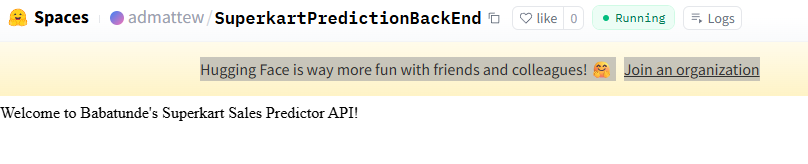

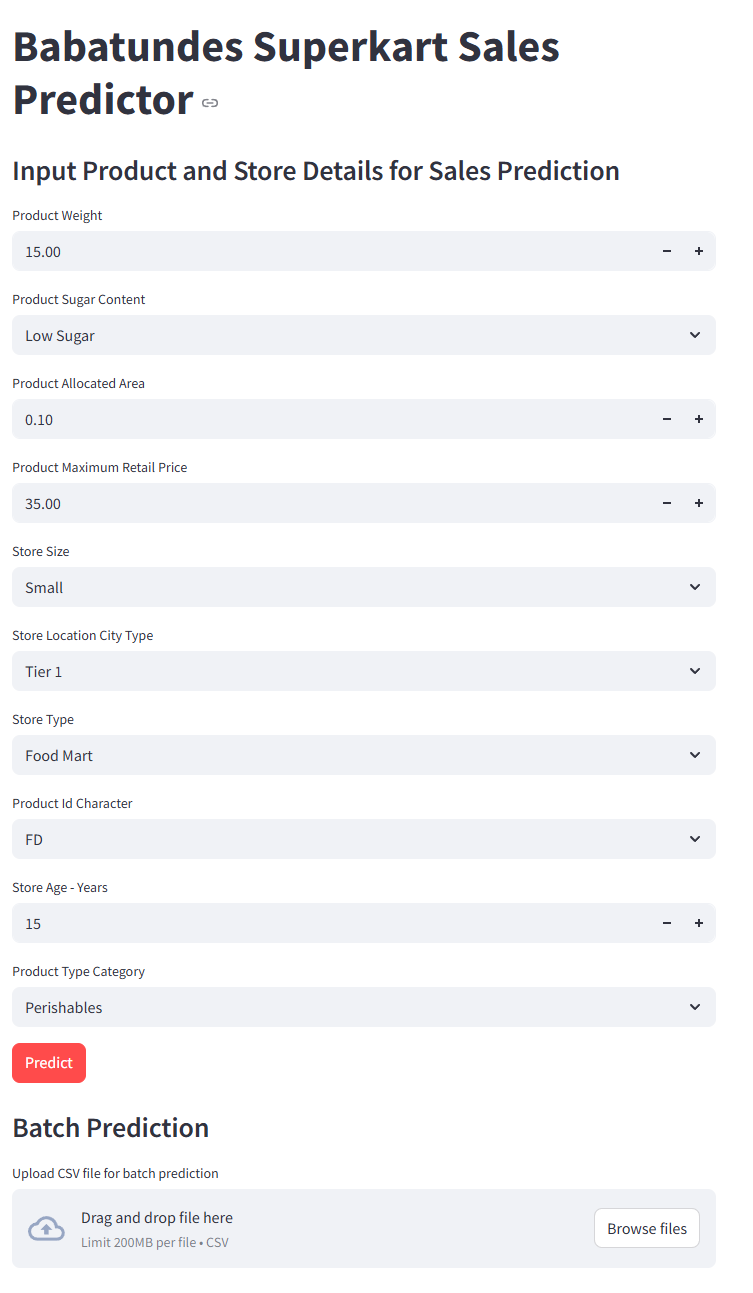